Hello there! If you are reading this, you will want to go all the way down to codeblock 117 to see the solution. The rest of the code is just for practice and testing purposes.

In [32]:
# pip install xgboost

Import Libraries

In [33]:
# try:
#     import joblib
#     import matplotlib.pyplot as plt
#     %matplotlib inline
#     import numpy as np
#     import pandas as pd
#     import seaborn as sns
#     from xgboost import XGBClassifier
#     from scipy import stats
#     from sklearn.cluster import KMeans
#     from sklearn.decomposition import PCA
#     from sklearn.datasets import make_regression, make_swiss_roll
#     from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
#     from sklearn.model_selection import GridSearchCV
#     from sklearn.linear_model import LinearRegression, LogisticRegression
#     from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#     from sklearn.model_selection import train_test_split
#     from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#     from sklearn.preprocessing import MinMaxScaler, StandardScaler
#     from sklearn.svm import SVC, SVR
#     from sklearn.tree import DecisionTreeClassifier

#     print('All libraries imported successfully!')
# except ImportError:
#     print('Some libraries failed to import.')

Load the Data

In [34]:
# # Load data from a CSV file
# df = pd.read_csv('tedsd_puf_2019.csv')
# print('tedsd_puf_2019.csv loaded')
# df.head()

#### Data Exploration

In [35]:
# # Summarize the data
# display(df.shape)
# display(df.describe())
# display(df.info())

Data Cleaning

Creating a copy of the dataframe to work with.

In [36]:
# # Create a copy of the data
# df1 = df.copy()
# print('Copy of the DataFrame')
# display(df1.head())

-9 values in the dataset are missing/unknown/not collected. I am going to replace them with NaN values.

In [37]:
# # In this dataset, -9 is used to represent missing values. Which columns have -9 as a value and how many?
# missing_values = df1.isin([-9]).sum()
# display(missing_values)

Searching for columns with -9 values.

In [38]:
# # What specific columns have -9 as a value?
# missing_columns = missing_values[missing_values > 0]
# display(missing_columns)

How many columns have -9 values?

In [39]:
# # How many columns have -9 as a value?
# display(len(missing_columns))

There are 40+ columns with -9 values.

In [40]:
# # Visualize all columns with -9 as a value
# missing_columns.plot(kind='bar', figsize=(15, 7))
# plt.title('Columns with -9 as a value')
# plt.xlabel('Columns')
# plt.ylabel('Frequency')
# plt.show()

In [41]:
# Replace -9 with NaN
# df1 = df1.replace(-9, np.nan)
# print('Replacing -9 with NaN. A -9 represents a missing value code in the dataset.')
# display(df1.head())

Looking for missing values in the dataset.

In [42]:
# Find columns that contain NaN values
# columns_with_nan = df1.isna().any()

# # Count the number of columns that contain NaN values
# num_columns_with_nan = columns_with_nan.sum()

# # Print the number of columns that contain NaN values
# print('There are',num_columns_with_nan,'columns that contain NaN.')

In [43]:
# Find columns that contain NaN values
# columns_with_nan = df1.columns[df1.isna().any()].tolist()

# # Calculate the percentage of NaN values in each of these columns
# nan_percentage = df1[columns_with_nan].isna().mean() * 100

# # Sort the percentages in ascending order
# nan_percentage_sorted = nan_percentage.sort_values(ascending=False)

# # Print the percentage of NaN values
# print('Percentage of NaN values in each column.')
# display(nan_percentage_sorted)

In [44]:
# Create a bar plot
# plt.figure(figsize=(20,18))
# sns.barplot(x=nan_percentage_sorted.values, y=nan_percentage_sorted.index)
# plt.title('Percentage of NaN values in columns')
# # Show the plot
# print('Bar plot showing the percentage of NaN values in columns.')
# plt.show()

In [45]:
# reason = df1['REASON']
# df1_corr = df1.corr()
# df1_corr.unstack().sort_values()
# variable = df1_corr['REASON'].sort_values()
# print('Correlation of REASON with other variables.')
# variable.tail()

In [46]:
# Create a list of colors based on the values in 'variable'
# colors = ['red' if x < 0 else 'blue' for x in variable[:-1]]

# # Visualize correlation to the target variable 'REASON'
# plt.figure(figsize=(20,18))
# variable[:-1].plot(kind='bar', color=colors)
# plt.title('Correlation to the target variable')
# print('Visualizing the positive and negative correlations of REASON with other variables.')
# plt.show()

Looking for positive correlated columns.

In [47]:
# Filter to include only positive correlations
# positive_correlations = variable[variable > 0]

# # Visualize positive correlations
# plt.figure(figsize=(20,18))
# positive_correlations[:-1].plot(kind='bar', color='blue')
# plt.title('This is a visualization of only the positive correlations to the target variable')
# print('Positive correlations of REASON with other variables.')
# print("\nSERVICES is the highest positive correlation and EMPLOY is the lowest positive correlation at the moment.")
# print("\nMore exploration is needed to understand the relationship between the target variable and the features.")
# plt.show()

Showing the percentage of missing values in the dataset.

In [48]:
# print('These are the columns with NaN values, with the highest percentage of NaN values at the top.')
# print("\nFor example, the column FREQ3_D has roughly 83.66 precent of its values as NaN.")
# print('\nThis means that 83.66 percent of the values in the column FREQ3_D are missing or not reported.')
# display(nan_percentage_sorted)
# display(df1_corr)

Wanted 

In [49]:
# Define the column names from the first set
# first_set = [
#     "FREQ3_D", "DETCRIM", "FREQ3", "FRSTUSE3", "ROUTE3", "DETNLF_D", "DETNLF",
#     "FREQ2_D", "PREG", "PRIMPAY", "DAYWAIT", "HLTHINS", "FRSTUSE2", "FREQ2",
#     "ROUTE2", "CBSA2010", "PRIMINC", "FREQ1_D", "DSMCRIT", "FREQ_ATND_SELF_HELP_D",
#     "MARSTAT", "LIVARAG_D", "ARRESTS_D", "FREQ_ATND_SELF_HELP", "EMPLOY_D", "PSYPROB",
#     "SUB1_D", "FREQ1", "SUB3", "ARRESTS", "METHUSE", "EDUC", "LIVARAG", "VET", "EMPLOY",
#     "FRSTUSE1", "ROUTE1", "NOPRIOR", "IDU", "SUB2_D", "PSOURCE", "SUB1", "SUB3_D",
#     "SUB2", "ETHNIC", "RACE", "GENDER"
# ]

# Define the column names from the second set
# second_set = [
#     "DISYR", "CASEID", "STFIPS", "CBSA2010", "EDUC", "MARSTAT", "SERVICES",
#     "DETCRIM", "LOS", "PSOURCE", "TRNQFLG", "BARBFLG", "SEDHPFLG", "INHFLG",
#     "OTCFLG", "OTHERFLG", "DIVISION", "REGION", "IDU", "ALCDRUG"
# ]

# Find the common column names
# common_columns = list(set(first_set).intersection(second_set))

# # Add quotations around each column name
# first_set_quoted = [f'"{col}"' for col in first_set]
# second_set_quoted = [f'"{col}"' for col in second_set]
# common_columns_quoted = [f'"{col}"' for col in common_columns]

# # Print the results
# print("Looking for common columns in two sets of column names to see if they need be removed or filled.")
# print("\nColumn Names from the First Set:(nan_percentage_sorted)")
# print(", ".join(first_set_quoted))
# print("\nColumn Names from the Second Set:(df1_corr)")
# print(", ".join(second_set_quoted))
# print("\nCommon Column Names: (To consider for removal/fill)")
# print(", ".join(common_columns_quoted))

# plt.figure(figsize=(20,18))
# plt.barh(first_set, [1]*len(first_set), color='blue', label='First Set')
# plt.barh(second_set, [1]*len(second_set), color='red', label='Second Set')
# plt.barh(common_columns, [1]*len(common_columns), color='yellow', label='Common Columns')
# plt.xlabel('Count')
# plt.title('Column Names')
# plt.legend()
# plt.show()

# Find the Nan percentages in the common columns
# nan_percentages_common = df1[common_columns].isna().mean() * 100

# Sort and display the result
# nan_percentages_common_sorted = nan_percentages_common.sort_values(ascending=False)
# display(nan_percentages_common_sorted)

#### Data Cleaning

In [50]:
# # In column FRSTUSE1 replace -9 with 0? Confirm with value counts.
# df1['FRSTUSE1'] = df1['FRSTUSE1'].replace(-9, 0)
# print(df1['FRSTUSE1'].value_counts())

In [51]:
# # In column FRSTUSE2 replace -9 with 0? Confirm with value counts.
# df1['FRSTUSE2'] = df1['FRSTUSE2'].replace(-9, 0)
# print(df1['FRSTUSE2'].value_counts())

In [52]:
# # In column FRSTUSE3 replace -9 with 0? Confirm with value counts.
# df1['FRSTUSE3'] = df1['FRSTUSE3'].replace(-9, 0)
# print(df1['FRSTUSE3'].value_counts())

In [53]:
# # In column SUB2 replace -9 with 19? Confirm with value counts.
# df1['SUB2'] = df1['SUB2'].replace(-9, 19)
# print(df1['SUB2'].value_counts())

In [54]:
# # In column SUB2_D replace -9 with 19? Confirm with value counts.
# df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 19)
# print(df1['SUB2_D'].value_counts())

In [55]:
# # In column SUB3 replace -9 with 19? Confirm with value counts.
# df1['SUB3'] = df1['SUB3'].replace(-9, 19)
# print(df1['SUB3'].value_counts())

In [56]:
# # In column SUB3_D replace -9 with 0? Confirm with value counts.
# df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
# print(df1['SUB3_D'].value_counts())

In [57]:
# # In column ROUTE3 replace -9 with 0? Confirm with value counts.
# df1['ROUTE3'] = df1['ROUTE3'].replace(-9, 0)
# print(df1['ROUTE3'].value_counts())

In [58]:
# # In column DSMCRIT replace -9 with 0? Confirm with value counts.
# df1['DSMCRIT'] = df1['DSMCRIT'].replace(-9, 0)
# print(df1['DSMCRIT'].value_counts())

In [59]:
# # In column PSYPROB replace -9 with 0? Confirm with value counts.
# df1['PSYPROB'] = df1['PSYPROB'].replace(-9, 0)
# print(df1['PSYPROB'].value_counts())

In [60]:
# # In column PRIMPAY replace -9 with 0? Confirm with value counts.
# df1['PRIMPAY'] = df1['PRIMPAY'].replace(-9, 0)
# print(df1['PRIMPAY'].value_counts())

In [61]:
# # In column FREQ_ATND_SELF_HELP replace -9 with 0? Confirm with value counts.
# df1['FREQ_ATND_SELF_HELP'] = df1['FREQ_ATND_SELF_HELP'].replace(-9, 0)
# print(df1['FREQ_ATND_SELF_HELP'].value_counts())

In [62]:
# # In column FREQ_ATND_SELF_HELP_D replace -9 with 0? Confirm with value counts.
# df1['FREQ_ATND_SELF_HELP_D'] = df1['FREQ_ATND_SELF_HELP_D'].replace(-9, 0)
# print(df1['FREQ_ATND_SELF_HELP_D'].value_counts())

#### Columns that need clarification:
* ROUTE2: Route of administration (secondary)
* IDU: Current IV drug use reported at admission
* HLTHINS: Health insurance


These are the 'Drug use reported at admission' columns. Not reported = 0, and reported = 1. The percentage for each column is fairly high. I believe that these columns are important for the model.

* ALCFLG: Alcohol reported at admission
* COKEFLG: Cocaine/crack reported at admission
* MARFLG: Marijuana/hashish reported at admission
* HERFLG: Heroin reported at admission
* METHFLG: Non-rx methadone reported at admission
* OPSYNFLG: Other opiates/synthetics reported at admission
* PCPFLG: PCP reported at admission
* HALLFLG: Hallucinogens reported at admission
* MTHAMFLG: Methamphetamine/speed reported at admission
* AMPHFLG: Other amphetamines reported at admission
* STIMFLG: Other stimulants reported at admission
* BENZFLG: Benzodiazepines reported at admission
* TRNQFLG: Other tranquilizers reported at admission
* BARBFLG: Barbiturates reported at admission
* SEDHPFLG: Other sedatives/hypnotics reported at admission
* INHFLG: Inhalants reported at admission
* OTCFLG: Over-the-counter medication reported at admission
* OTHERFLG: Other drug reported at admission

#### Data Preprocessing

In [63]:
# # What are the correlations of all columns to the target variable 'REASON'?
# df1_corr = df1.corr()
# variable = df1_corr['REASON'].sort_values()
# print('Correlation of REASON with other variables.')
# display(variable)

In [64]:
# # Visualize only the positive correlations
# positive_correlations = variable[variable > 0]
# plt.figure(figsize=(20,18))
# positive_correlations.plot(kind='bar', color='blue')
# plt.title('Visualization of only the positive correlations to the target variable')
# plt.show()

In [65]:
# # Display LOS
# los = df1['LOS']
# display(los)

In [66]:
# # In LOS (Length of Stay) column, replace the values with the following:
# # if days is between 1 and 30, return 1
# # if days is between 31 and 45, return 2
# # if days is between 46 and 60, return 3
# # if days is between 61 and 90, return 4
# # if days is between 91 and 120, return 5
# # if days is between 121 and 180, return 6
# # if days is between 181 and 365, return 7
# # if days is greater than 365, return 8
# # if days is any other value, return None



# def los_to_category(days):
#     if 1 <= days <= 30: 
#         return 1    
#     elif 31 <= days <= 45: 
#         return 2    
#     elif 46 <= days <= 60: 
#         return 3    
#     elif 61 <= days <= 90: 
#         return 4    
#     elif 91 <= days <= 120: 
#         return 5    
#     elif 121 <= days <= 180: 
#         return 6    
#     elif 181 <= days <= 365: 
#         return 7    
#     elif days > 365: 
#         return 8  
#     else:   
#         return None  

# # Test cases
# print(los_to_category(15))  # Expected output: 1
# print(los_to_category(35))  # Expected output: 2
# print(los_to_category(50))  # Expected output: 3
# print(los_to_category(70))  # Expected output: 4
# print(los_to_category(100))  # Expected output: 5
# print(los_to_category(150))  # Expected output: 6
# print(los_to_category(200))  # Expected output: 7
# print(los_to_category(400))  # Expected output: 8
# print(los_to_category(-5))  # Expected output: None

In [67]:
# # Check for missing values in the LOS column
# missing_values_los = los.isna().sum()
# print('Missing values in the LOS column:', missing_values_los)

In [68]:
# # Check for -9 in the LOS column
# missing_values_los = los.isin([-9]).sum()
# print('Missing values in the LOS column:', missing_values_los)

It got weird. Now we are dropping columns that are not important for the model.

In [69]:
# df1 = df.copy()
# # from conversation with "house of Hope recovery" class 4 which is "transfer to a different facility" would also be considered a success.
# for value in df1['REASON']:
#     if value == 1:
#         value = value
#     elif value == 4:
#         value = 1
#     else:
#         value = 0
# df1['REASON'] = df1['REASON'].replace(4, 1)
# df1['REASON'] = df1['REASON'].replace(2, 0)
# df1['REASON'] = df1['REASON'].replace(3, 0)
# df1['REASON'] = df1['REASON'].replace(5, 0)
# df1['REASON'] = df1['REASON'].replace(6, 0)
# df1['REASON'] = df1['REASON'].replace(7, 0)
# df1['REASON'].value_counts()

In [70]:
# # time to clean up the data starting with SUB1_D 
# # alcohol could be a success, mmj could be a success
# for value in df1['SUB1_D']:
#     if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
#         value = 1
#     else:
#         value = 0
# df1['SUB1_D'] = df1['SUB1_D'].replace(14, 1)
# df1['SUB1_D'] = df1['SUB1_D'].replace(16, 1)
# df1['SUB1_D'] = df1['SUB1_D'].replace(18, 1)
# df1['SUB1_D'] = df1['SUB1_D'].replace(12, 1)
# df1['SUB1_D'] = df1['SUB1_D'].replace(13, 1)
# df1['SUB1_D'] = df1['SUB1_D'].replace(2, 1)
# df1['SUB1_D'] = df1['SUB1_D'].replace(3, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(4, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(5, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(6, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(7, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(8, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(9, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(10, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(11, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(15, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(17, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(19, 0)

# df1['SUB1'] = df1['SUB1'].replace(14, 1)
# df1['SUB1'] = df1['SUB1'].replace(16, 1)
# df1['SUB1'] = df1['SUB1'].replace(18, 1)
# df1['SUB1'] = df1['SUB1'].replace(12, 1)
# df1['SUB1'] = df1['SUB1'].replace(13, 1)
# df1['SUB1'] = df1['SUB1'].replace(2, 1)
# df1['SUB1'] = df1['SUB1'].replace(3, 0)
# df1['SUB1'] = df1['SUB1'].replace(4, 0)
# df1['SUB1'] = df1['SUB1'].replace(5, 0)
# df1['SUB1'] = df1['SUB1'].replace(6, 0)
# df1['SUB1'] = df1['SUB1'].replace(7, 0)
# df1['SUB1'] = df1['SUB1'].replace(8, 0)
# df1['SUB1'] = df1['SUB1'].replace(9, 0)
# df1['SUB1'] = df1['SUB1'].replace(10, 0)
# df1['SUB1'] = df1['SUB1'].replace(11, 0)
# df1['SUB1'] = df1['SUB1'].replace(15, 0)
# df1['SUB1'] = df1['SUB1'].replace(17, 0)
# df1['SUB1'] = df1['SUB1'].replace(19, 0)

# df1['SUB2_D'] = df1['SUB2_D'].replace(14, 1)
# df1['SUB2_D'] = df1['SUB2_D'].replace(16, 1)
# df1['SUB2_D'] = df1['SUB2_D'].replace(18, 1)
# df1['SUB2_D'] = df1['SUB2_D'].replace(12, 1)
# df1['SUB2_D'] = df1['SUB2_D'].replace(13, 1)
# df1['SUB2_D'] = df1['SUB2_D'].replace(2, 1)
# df1['SUB2_D'] = df1['SUB2_D'].replace(3, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(4, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(5, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(6, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(7, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(8, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(9, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(10, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(11, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(15, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(17, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(19, 0)

# df1['SUB2'] = df1['SUB2'].replace(14, 1)
# df1['SUB2'] = df1['SUB2'].replace(16, 1)
# df1['SUB2'] = df1['SUB2'].replace(18, 1)
# df1['SUB2'] = df1['SUB2'].replace(12, 1)
# df1['SUB2'] = df1['SUB2'].replace(13, 1)
# df1['SUB2'] = df1['SUB2'].replace(2, 1)
# df1['SUB2'] = df1['SUB2'].replace(3, 0)
# df1['SUB2'] = df1['SUB2'].replace(4, 0)
# df1['SUB2'] = df1['SUB2'].replace(5, 0)
# df1['SUB2'] = df1['SUB2'].replace(6, 0)
# df1['SUB2'] = df1['SUB2'].replace(7, 0)
# df1['SUB2'] = df1['SUB2'].replace(8, 0)
# df1['SUB2'] = df1['SUB2'].replace(9, 0)
# df1['SUB2'] = df1['SUB2'].replace(10, 0)
# df1['SUB2'] = df1['SUB2'].replace(11, 0)
# df1['SUB2'] = df1['SUB2'].replace(15, 0)
# df1['SUB2'] = df1['SUB2'].replace(17, 0)
# df1['SUB2'] = df1['SUB2'].replace(19, 0)

# df1['SUB3_D'] = df1['SUB3_D'].replace(14, 1)
# df1['SUB3_D'] = df1['SUB3_D'].replace(16, 1)
# df1['SUB3_D'] = df1['SUB3_D'].replace(18, 1)
# df1['SUB3_D'] = df1['SUB3_D'].replace(12, 1)
# df1['SUB3_D'] = df1['SUB3_D'].replace(13, 1)
# df1['SUB3_D'] = df1['SUB3_D'].replace(2, 1)
# df1['SUB3_D'] = df1['SUB3_D'].replace(3, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(4, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(5, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(6, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(7, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(8, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(9, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(10, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(11, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(15, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(17, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(19, 0)

# df1['SUB3'] = df1['SUB3'].replace(14, 1)
# df1['SUB3'] = df1['SUB3'].replace(16, 1)
# df1['SUB3'] = df1['SUB3'].replace(18, 1)
# df1['SUB3'] = df1['SUB3'].replace(12, 1)
# df1['SUB3'] = df1['SUB3'].replace(13, 1)
# df1['SUB3'] = df1['SUB3'].replace(2, 1)
# df1['SUB3'] = df1['SUB3'].replace(3, 0)
# df1['SUB3'] = df1['SUB3'].replace(4, 0)
# df1['SUB3'] = df1['SUB3'].replace(5, 0)
# df1['SUB3'] = df1['SUB3'].replace(6, 0)
# df1['SUB3'] = df1['SUB3'].replace(7, 0)
# df1['SUB3'] = df1['SUB3'].replace(8, 0)
# df1['SUB3'] = df1['SUB3'].replace(9, 0)
# df1['SUB3'] = df1['SUB3'].replace(10, 0)
# df1['SUB3'] = df1['SUB3'].replace(11, 0)
# df1['SUB3'] = df1['SUB3'].replace(15, 0)
# df1['SUB3'] = df1['SUB3'].replace(17, 0)
# df1['SUB3'] = df1['SUB3'].replace(19, 0)
# # df1['SUB1_D'].notna().value_counts()
# # time to clean up the data starting with SUB1 
# # alcohol could be a success, mmj could be a success, using the same values for SUB1_D
# for value in df1['SUB1']:
#     if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
#         value = 1
#     else:
#         value = 0
# for value in df1['SUB2_D']:
#     if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
#         value = 1
#     else:
#         value = 0
# # df1['SUB1_D'].notna().value_counts()
# # time to clean up the data starting with SUB1 
# # alcohol could be a success, mmj could be a success, using the same values for SUB1_D
# for value in df1['SUB2']:
#     if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
#         value = 1
#     else:
#         value = 0
# for value in df1['SUB3_D']:
#     if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
#         value = 1
#     else:
#         value = 0
# # df1['SUB1_D'].notna().value_counts()
# # time to clean up the data starting with SUB1 
# # alcohol could be a success, mmj could be a success, using the same values for SUB1_D
# for value in df1['SUB3']:
#     if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
#         value = 1
#     else:
#         value = 0
# df1['SUB1'] = df1['SUB1'].replace(-9, 0)
# df1['SUB1_D'] = df1['SUB1_D'].replace(-9, 0)
# df1['SUB2'] = df1['SUB2'].replace(-9, 0)
# df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 0)
# df1['SUB3'] = df1['SUB3'].replace(-9, 0)
# df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
# print(df1['SUB1'].value_counts())
# print(df1['SUB1_D'].value_counts())
# print(df1['SUB2'].value_counts())
# print(df1['SUB2_D'].value_counts())
# print(df1['SUB3'].value_counts())
# print(df1['SUB3_D'].value_counts())

# # df1['SUB1_D'].notna().value_counts()
# # # In column SUB2 replace -9 with 19
# df1['SUB2'] = df1['SUB2'].replace(-9, 19)
# # print(df1['SUB2'].value_counts())
# # # In column SUB2_D replace -9 with 19
# # # df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 19)
# # print(df1['SUB2_D'].value_counts())
# # # In column SUB3 replace -9 with 19
# # # df1['SUB3'] = df1['SUB3'].replace(-9, 19)
# # print(df1['SUB3'].value_counts())
# # # In column SUB3_D replace -9 with 0
# # # df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
# # print(df1['SUB3_D'].value_counts())

In [71]:
# # time to clean up the data with FREQ1_D, FREQ2_D, FREQ3_D
# # replacing -9 in the columns with 1 since 1 indicates 'no use' and if data was missing we assumed it was irrelivent to begin with
# df1['FREQ1_D'] = df1['FREQ1_D'].replace(-9, 1)
# df1['FREQ2_D'] = df1['FREQ2_D'].replace(-9, 1)
# df1['FREQ3_D'] = df1['FREQ3_D'].replace(-9, 1)

In [72]:
# # time to clean up the data with FREQ1, FREQ2, FREQ3
# # replacing -9 in the columns with 1 since 1 indicates 'no use' and if data was missing we assumed it was irrelivent to begin with
# df1['FREQ1'] = df1['FREQ1'].replace(-9, 1)
# df1['FREQ2'] = df1['FREQ2'].replace(-9, 1)
# df1['FREQ3'] = df1['FREQ3'].replace(-9, 1)

In [73]:
# # time to clean up the data with 'CASEID'
# df1['CASEID'].notna().value_counts()
# # CASEID has no null values and does need info filled
# # we can drop this field
# df1 = df1.drop(columns="CASEID")

In [74]:
# # time to clean up the data with 'AGE'
# df1['AGE'].notna().value_counts()
# # AGE has no null values and does need info filled

In [75]:
# # time to clean up the data with 'GENDER'
# # gender is not a columns where we can fill in the data and not decrease the accuracy. so for all -9 values I am replacing with 0
# df1['GENDER'] = df1['GENDER'].replace(-9, 0)
# df1['GENDER'].notna().value_counts()

In [76]:
# # time to clean up the data with 'DISYR'
# df1['DISYR'].notna().value_counts()
# # DISYR has no null values and does need info filled
# # drop this column
# df1 = df1.drop(columns="DISYR")

In [77]:
# # time to clean up the data with 'RACE'
# # for race, '7' indicateds 'other single race  so for all -9 values i replaces them with 7
# df1['RACE'] = df1['RACE'].replace(-9, 7)
# df1['RACE'].notna().value_counts()

In [78]:
# # time to clean up the data with 'ETHNIC'
# # for ETHNIC, '4' indicateds 'other single race  so for all -9 values I replaced them with 4
# df1['ETHNIC'] = df1['ETHNIC'].replace(-9, 4)
# df1['ETHNIC'].notna().value_counts()

In [79]:
# # time to clean up the data with 'MARSTAT'
# # for MARSTAT, hard to determine what to fill -9 with so filling with 0 for now
# df1['MARSTAT'] = df1['MARSTAT'].replace(-9, 0)
# df1['MARSTAT'].notna().value_counts()

In [80]:
# # time to clean up the data with 'EDUC'
# # for EDUC, hard to determine what to fill -9 with. options are 1-5 so filling with 2 as it seems like a fair average
# df1['EDUC'] = df1['EDUC'].replace(-9, 2)
# df1['EDUC'].notna().value_counts()

In [81]:
# # time to clean up the data with 'EMPLOY' and 'EMPLOY_D'
# # for EMPLOY, hard to determine what to fill -9 with. options are 1-4. filling with 2 for now since if the data is missing is seems like that would indicate 'unemployed'
# df1['EMPLOY'] = df1['EMPLOY'].replace(-9, 0)
# df1['EMPLOY_D'] = df1['EMPLOY_D'].replace(-9, 0)
# df1['EMPLOY'].notna().value_counts()

In [82]:
# # time to clean up the data with 'DETNLF' and 'DETNLF_D'
# # for DETNLF, its just details on the previous columns not in labor force option so im replacing missing values with 0 as to not affect the results as much. we may want to drop this column
# # df1['DETNLF'] = df1['DETNLF'].replace(-9, 0)
# # df1['DETNLF_D'] = df1['DETNLF_D'].replace(-9, 0)
# # df1['DETNLF'].notna().value_counts()
# # drop this column
# df1 = df1.drop(columns="DETNLF")
# df1 = df1.drop(columns="DETNLF_D")

In [83]:
# # time to clean up the data with 'PREG'
# # for PREG, -9 most likely indicates male patients. replacing with 0 as to not affect the results as much. 
# df1['PREG'] = df1['PREG'].replace(-9, 2)
# df1['PREG'].notna().value_counts()

In [84]:
# # time to clean up the data with 'VET'
# # for VET, -9 most likely indicates not a veteren so im replacing -9 with 2 for 'no'
# df1['VET'] = df1['VET'].replace(-9, 2)
# df1['VET'].value_counts()

In [85]:
# # time to clean up the data with 'LIVARAG'
# # for LIVARAG, its hard to determine what -9 could indicate so im replacing -9 with 0 as to not affect the data as much with the -9's in this column
# df1['LIVARAG'] = df1['LIVARAG'].replace(-9, 1)
# df1['LIVARAG_D'] = df1['LIVARAG_D'].replace(-9, 1)
# df1['LIVARAG'].value_counts()

In [86]:
# # time to clean up the data with 'PRIMINC'
# # for PRIMINC, its hard to determine what -9 could indicate so im replacing -9 with 0 as to not affect the data as much with the -9's in this column
# df1['PRIMINC'] = df1['PRIMINC'].replace(-9, 4)
# df1['PRIMINC'].value_counts()

In [87]:
# # time to clean up the data with 'ARRESTS' and 'ARRESTS_D'
# # for 'ARRESTS' and 'ARRESTS_D', 0 indicates none so im setting -9 to none as that seems most likely to be the case if the information is missing
# df1['ARRESTS'] = df1['ARRESTS'].replace(-9, 0)
# df1['ARRESTS_D'] = df1['ARRESTS_D'].replace(-9, 0)
# df1['ARRESTS'].value_counts()
# df1['ARRESTS_D'].value_counts()

In [88]:
# # time to clean up the data with ' STFIPS'
# # for ' STFIPS', there are no null values in this column but we may want to remove it because the large values could through the accuracy off
# df1['STFIPS'].notna().value_counts()
# # drop this column
# df1 = df1.drop(columns="STFIPS")

In [89]:
# # time to clean up the data with 'REGION'
# # for 'REGION', there are no null values in this column but we may want to remove it because the values could through the accuracy off and it doesnt seem to be relevant data
# df1['REGION'].value_counts()

In [90]:
# # time to clean up the data with 'DIVISION'
# # for 'DIVISION', there are no null values in this column but we may want to remove it because the values could through the accuracy off and it doesnt seem to be relevant data
# df1['DIVISION'].value_counts()

In [91]:
# # time to clean up the data with 'SERVICES and SERVICES_D'
# # for 'SERVICES and SERVICES_D', there are no null values in this column but we may want to remove it because the values could through the accuracy off and it doesnt seem to be relevant data for the questions we are trying to answer
# df1['SERVICES'].value_counts()
# df1['SERVICES_D'].value_counts()

In [92]:
# # time to clean up the data with 'DAYWAIT'
# # for 'DAYWAIT', its seems safe to replace a value of missing data with a value of '0' to indicate that they didnt wait
# df1['DAYWAIT'] = df1['DAYWAIT'].replace(-9, 0)
# df1['DAYWAIT'].value_counts()

In [93]:
# # time to clean up the data with 'METHUSE'
# # for 'METHUSE', its seems safe to replace a value of missing data with a value of 'none'
# df1['METHUSE'] = df1['METHUSE'].replace(-9, 0)
# df1['METHUSE'].value_counts()

In [94]:
# # time to clean up the data with 'LOS'
# # for 'LOS', stands for length of stay this data seems irrelivent to the questions we are trying to answer so I suggest dropping the column to perserve prediction accuracy
# # 1-30, 31-45, 46-60, 61-90, 91-120, 121-180, 181-365, more than
# def los_to_category(days):
#     if days <= 30:
#         return 1
#     elif days <= 31:
#         return 2
#     elif days <= 32:
#         return 3
#     elif days <= 33:
#         return 4
#     elif days <= 34:
#         return 5
#     elif days <= 35:
#         return 6
#     elif days <= 36:
#         return 7
#     else:
#         return 8
# # Test cases

# # df1['LOS'].value_counts()

In [95]:
# print(los_to_category(15))  # Expected output: 1
# print(los_to_category(35))  # Expected output: 2
# print(los_to_category(50))  # Expected output: 3
# print(los_to_category(70))  # Expected output: 4
# print(los_to_category(100))  # Expected output: 5
# print(los_to_category(150))  # Expected output: 6
# print(los_to_category(200))  # Expected output: 7
# print(los_to_category(400))  # Expected output: 8
# print(los_to_category(-5))  # Expected output: None

In [96]:
# df1['LOS'] = df1['LOS'].apply(los_to_category)

In [97]:
# df1['LOS'].value_counts()

In [98]:
# # time to clean up the data with PSOURCE: Referral source
# # for 'PSOURCE' this doesnt seem to me to be relevant data so im replacing -9 with 1 for now to indicate that it was self motivated
# df1['PSOURCE'] = df1['PSOURCE'].replace(-9, 1)

In [99]:
# # time to clean up the data with DETCRIM: Detailed criminal justice referral
# # for 'DETCRIM' im replacing -9 with 0 for now. most of this data is missing. we may want to drop this column
# df1['DETCRIM'] = df1['DETCRIM'].replace(-9, 0)
# # drop this column
# df1 = df1.drop(columns="DETCRIM")

In [100]:
# # time to clean up the data with NOPRIOR: Previous substance use treatment episodes
# # for 'NOPRIOR' im replacing -9 with 0 for now. its could go either way. we will ask clients
# df1['NOPRIOR'] = df1['NOPRIOR'].replace(-9, 0)

In [101]:
# # time to clean up the data with ROUTE1: Route of administration (primary)
# # time to clean up the data with ROUTE2: Route of administration (secondary)
# # time to clean up the data with ROUTE3: Route of administration (tertiary)
# # for 'ROUTE1' im replacing -9 with 5 for now to indicate 'other'. its could go either way. we will ask clients
# df1['ROUTE1'] = df1['ROUTE1'].replace(-9, 5)
# df1['ROUTE2'] = df1['ROUTE2'].replace(-9, 5)
# df1['ROUTE3'] = df1['ROUTE3'].replace(-9, 5)

In [102]:
# # time to clean up the data with FRSTUSE1: Age at first use (primary)
# # FRSTUSE1 is a column where its hard to determine what a value of -9 should be replaced with so im replacing it with 0 for now to have less of an impact on the data
# df1['FRSTUSE1'] = df1['FRSTUSE1'].replace(-9, 3)
# # adding Beau's code
# # In column FRSTUSE2 replace -9 with 0
# df1['FRSTUSE2'] = df1['FRSTUSE2'].replace(-9, 3)
# print(df1['FRSTUSE2'].value_counts())
# # In column FRSTUSE3 replace -9 with 0
# df1['FRSTUSE3'] = df1['FRSTUSE3'].replace(-9, 3)
# print(df1['FRSTUSE3'].value_counts())

In [103]:
# # In column SUB2 replace -9 with 19
# df1['SUB2'] = df1['SUB2'].replace(-9, 19)
# print(df1['SUB2'].value_counts())
# # In column SUB2_D replace -9 with 19
# df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 19)
# print(df1['SUB2_D'].value_counts())

In [104]:
# # In column SUB3 replace -9 with 19
# df1['SUB3'] = df1['SUB3'].replace(-9, 19)
# print(df1['SUB3'].value_counts())
# # In column SUB3_D replace -9 with 0
# df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
# print(df1['SUB3_D'].value_counts())

In [105]:
# # In column ROUTE3 replace -9 with 0
# df1['ROUTE3'] = df1['ROUTE3'].replace(-9, 0)
# print(df1['ROUTE3'].value_counts())

In [106]:
# # In column DSMCRIT replace -9 with 0
# df1['DSMCRIT'] = df1['DSMCRIT'].replace(-9, 5)
# print(df1['DSMCRIT'].value_counts())

In [107]:
# # In column PSYPROB replace -9 with 1
# df1['PSYPROB'] = df1['PSYPROB'].replace(-9, 1)
# print(df1['PSYPROB'].value_counts())

In [108]:
# # In column PRIMPAY replace -9 with 1
# df1['PRIMPAY'] = df1['PRIMPAY'].replace(-9, 1)
# print(df1['PRIMPAY'].value_counts())

In [109]:
# # In column FREQ_ATND_SELF_HELP replace -9 with 0
# df1['FREQ_ATND_SELF_HELP'] = df1['FREQ_ATND_SELF_HELP'].replace(-9, 3)
# print(df1['FREQ_ATND_SELF_HELP'].value_counts())
# # In column FREQ_ATND_SELF_HELP_D replace -9 with 0
# df1['FREQ_ATND_SELF_HELP_D'] = df1['FREQ_ATND_SELF_HELP_D'].replace(-9, 3)
# print(df1['FREQ_ATND_SELF_HELP_D'].value_counts())

In [110]:
# reason = df1['REASON']
# df1_corr = df1.corr()
# df1_corr.unstack().sort_values()
# variable = df1_corr['REASON'].sort_values()
# variable.tail(20)

In [111]:
# # Display df1
# display(df1)

In [112]:
# # What columns are highly correlated with the target variable 'REASON'?
# high_corr_df = df1_corr['REASON'].sort_values()
# print('Correlation of REASON with other variables.')
# display(high_corr_df.tail(21))

In [113]:
# # Visualize only the positive correlations
# positive_correlations = high_corr_df[high_corr_df > 0]
# plt.figure(figsize=(20,18))
# positive_correlations.plot(kind='bar', color='blue')
# plt.title('Visualization of only the positive correlations to the target variable')
# plt.show()

#### Random Forest Regressor Outputs:

* First Run:
    * Training Accuracy: 0.9980399157620962
    * Testing Accuracy: 0.837835013541325

* Second Run:
    * Training Accuracy: 
    * Testing Accuracy: 


In [114]:
# # Drop the target variable 'REASON' from the dataset
# X = df1.drop(columns='REASON')
# y = df1['REASON']

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit on the training data
# X_train = scaler.fit_transform(X_train)

# # Transform the testing data
# X_test = scaler.transform(X_test)

# # Create a Random Forest model
# rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, random_state=42)
# et_model = ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, random_state=42)




# # Train the RandomForest model
# rf_model.fit(X_train, y_train)

# # Make predictions with the RandomForest model
# y_train_pred_rf = rf_model.predict(X_train)
# y_test_pred_rf = rf_model.predict(X_test)

# # Calculate the RandomForest accuracies
# train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
# test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# # Print the RandomForest accuracies
# print('RandomForest Training Accuracy:', train_accuracy_rf)
# print('RandomForest Testing Accuracy:', test_accuracy_rf)

# # Train the ExtraTrees model
# et_model.fit(X_train, y_train)

# # Make predictions with the ExtraTrees model
# y_train_pred_et = et_model.predict(X_train)
# y_test_pred_et = et_model.predict(X_test)

# # Calculate the ExtraTrees accuracies
# train_accuracy_et = accuracy_score(y_train, y_train_pred_et)
# test_accuracy_et = accuracy_score(y_test, y_test_pred_et)

# # Print the ExtraTrees accuracies
# print('ExtraTrees Training Accuracy:', train_accuracy_et)
# print('ExtraTrees Testing Accuracy:', test_accuracy_et)

In [115]:
# # Print the RandomForest accuracies
# print('RandomForest Training Accuracy:', train_accuracy_rf)
# print('RandomForest Testing Accuracy:', test_accuracy_rf)

# # Check for overfitting and underfitting in RandomForest
# if train_accuracy_rf > test_accuracy_rf:
#     print('RandomForest is overfitting.')
# elif train_accuracy_rf < test_accuracy_rf:
#     print('RandomForest is underfitting.')
# else:
#     print('RandomForest is fitting well.')

# # Print the ExtraTrees accuracies
# print('ExtraTrees Training Accuracy:', train_accuracy_et)
# print('ExtraTrees Testing Accuracy:', test_accuracy_et)

# # Check for overfitting and underfitting in ExtraTrees
# if train_accuracy_et > test_accuracy_et:
#     print('ExtraTrees is overfitting.')
# elif train_accuracy_et < test_accuracy_et:
#     print('ExtraTrees is underfitting.')
# else:
#     print('ExtraTrees is fitting well.')

In [116]:
# from sklearn.model_selection import cross_val_score

# # Perform cross-validation on the RandomForest model
# rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
# print('RandomForest Cross-Validation Accuracy:', np.mean(rf_scores))

# # Perform cross-validation on the ExtraTrees model
# et_scores = cross_val_score(et_model, X_train, y_train, cv=5)
# print('ExtraTrees Cross-Validation Accuracy:', np.mean(et_scores))

### Import Libraries

In [117]:
try:
    import joblib
    import matplotlib.pyplot as plt
    %matplotlib inline
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from xgboost import XGBClassifier
    from scipy import stats
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from sklearn.datasets import make_regression, make_swiss_roll
    from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LinearRegression, LogisticRegression
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
    from sklearn.preprocessing import MinMaxScaler, StandardScaler
    from sklearn.svm import SVC, SVR
    from sklearn.tree import DecisionTreeClassifier

    print('All libraries imported successfully!')
except ImportError:
    print('Some libraries failed to import.')

All libraries imported successfully!


### Load the Data

In [118]:
while True:
    try:
        df = pd.read_csv('tedsd_puf_2019.csv')
        if df.empty:
            print('DataFrame is empty. Trying again...')
        else:
            print('The first 5 rows of the DataSet:')
            print(df.head())
            print('The CSV has been loaded successfully!')
            break
    except Exception as e:
        print('Error occurred:', e)
        print('Trying again...')

The first 5 rows of the DataSet:
   DISYR       CASEID  STFIPS  CBSA2010  EDUC  MARSTAT  SERVICES  DETCRIM  \
0   2019  20191553576       2        -9     4        1         7       -9   
1   2019  20191465214       2        -9     3        1         7       -9   
2   2019  20191443889       2        -9     2        1         7       -9   
3   2019  20191409377       2        -9     3        1         7       -9   
4   2019  20191479567       2        -9     3        3         7       -9   

   LOS  PSOURCE  ...  TRNQFLG  BARBFLG  SEDHPFLG  INHFLG  OTCFLG  OTHERFLG  \
0   37        1  ...        0        0         0       0       0         0   
1   35        1  ...        0        0         0       0       0         0   
2   35        1  ...        0        0         0       0       0         0   
3   37        1  ...        0        0         0       0       0         0   
4   37        1  ...        0        0         0       0       0         0   

   DIVISION  REGION  IDU  ALCDRUG  

The dataset from 2019 includes 76 columns with attributes such as educational status, marital status, and service utilization. The first five rows show consistent values for state and division, with variations in alcohol or drug use. Many columns contain binary or categorical data, indicating various conditions.

### Understand the Data

In [119]:
print('The shape of the DataSet:')
print(df.shape)


The shape of the DataSet:
(1722503, 76)


The dataset consists of 1,722,503 rows and 76 columns. This indicates a large volume of data, each entry representing a unique case with various attributes. The data covers a wide range of information as indicated by the number of columns.

In [120]:
print('The basic information of the DataSet:')
print(df.info())


The basic information of the DataSet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722503 entries, 0 to 1722502
Data columns (total 76 columns):
 #   Column                 Dtype
---  ------                 -----
 0   DISYR                  int64
 1   CASEID                 int64
 2   STFIPS                 int64
 3   CBSA2010               int64
 4   EDUC                   int64
 5   MARSTAT                int64
 6   SERVICES               int64
 7   DETCRIM                int64
 8   LOS                    int64
 9   PSOURCE                int64
 10  NOPRIOR                int64
 11  ARRESTS                int64
 12  EMPLOY                 int64
 13  METHUSE                int64
 14  PSYPROB                int64
 15  PREG                   int64
 16  GENDER                 int64
 17  VET                    int64
 18  LIVARAG                int64
 19  DAYWAIT                int64
 20  SERVICES_D             int64
 21  REASON                 int64
 22  EMPLOY_D               int64

The dataset contains 1,722,503 entries with 76 columns, each column being of integer type (int64). It includes a wide range of attributes such as educational status, marital status, employment, and various flags indicating conditions or behaviors. The total memory usage for this dataset is approximately 998.8 MB.

In [121]:
print('The statistical summary of the DataSet:')
print(df.describe())

for col in df.columns:
    if df[col].lt(0).any():
        print(f'The column {col} has negative values.')

The statistical summary of the DataSet:
           DISYR        CASEID        STFIPS      CBSA2010          EDUC  \
count  1722503.0  1.722503e+06  1.722503e+06  1.722503e+06  1.722503e+06   
mean      2019.0  2.019087e+10  2.558714e+01  1.817492e+04  1.777766e+00   
std          0.0  5.065654e+05  1.427222e+01  1.728295e+04  3.731331e+00   
min       2019.0  2.019000e+10  1.000000e+00 -9.000000e+00 -9.000000e+00   
25%       2019.0  2.019044e+10  1.200000e+01 -9.000000e+00  2.000000e+00   
50%       2019.0  2.019087e+10  2.700000e+01  1.674000e+04  3.000000e+00   
75%       2019.0  2.019131e+10  3.600000e+01  3.562000e+04  3.000000e+00   
max       2019.0  2.019176e+10  7.200000e+01  4.970000e+04  5.000000e+00   

            MARSTAT      SERVICES       DETCRIM           LOS       PSOURCE  \
count  1.722503e+06  1.722503e+06  1.722503e+06  1.722503e+06  1.722503e+06   
mean  -5.340136e-01  5.540790e+00 -6.617934e+00  2.018519e+01  2.483211e+00   
std    4.470499e+00  1.938862e+00  5.0

Observations:
1. DISYR (year):
    - All records are from the year 2019 (mean, min, max, are all 2019)
    - Data was collected ina single year.

2. CASEID:
    - Unique identifier for each case.

3. STFIPS (State FIPS code):
   - Values range frome 1 to 72.
   - Wide range of geographic locations are represented.

4. CBSA2010 (Core Based Statistical Area):
    - The presence of -9 values suggest missing or undefined data encoded as -9.

5. EDUC (Education Level):
    - Also has -9 values indicating missing or undefined data entries.

There are several columns with negative values (-9) which indicate missing or undefined data. These will need to be addressed before any analysis can be performed.


### Data Cleaning

In [122]:
# Handling missing values
print('Checking for missing values in the DataSet.')
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f'The DataSet has {missing_values} missing values.')
else:
    print('The DataSet has no missing values.')

Checking for missing values in the DataSet.
The DataSet has no missing values.


In [123]:
# Handle duplicate values
print('Checking for duplicate values in the DataSet:')
duplicate_values = df.duplicated().sum()
if duplicate_values > 0:
    print(f'The DataSet has {duplicate_values} duplicate values.')
else:
    print('The DataSet has no duplicate values.')

Checking for duplicate values in the DataSet:
The DataSet has no duplicate values.


The dataset contains no missing values, ensuring completeness across all entries. This means every one of the 1,722,503 rows and 76 columns is fully populated.

In [124]:
# Handle outliers
print('Checking for outliers in the DataSet:')
z = np.abs(stats.zscore(df))
outliers = np.where(z > 3)
if outliers[0].size > 0:
    print(f'The DataSet has {outliers[0].size} potential outliers.')
else:
    print('The DataSet has no potential outliers.')

Checking for outliers in the DataSet:
The DataSet has 1106580 potential outliers.


The dataset has 1,106,580 potential outliers. This significant number of outliers indicates a substantial amount of data points that deviate from the expected range.

In [125]:
# What columns have -9 values?
print('The columns with -9 values:')
for col in df.columns:
    if -9 in df[col].values:
        print(col)

print('Yup, these -9 values mean missing values. Let\'s go ahead and deal with this.')

The columns with -9 values:
CBSA2010
EDUC
MARSTAT
DETCRIM
PSOURCE
NOPRIOR
ARRESTS
EMPLOY
METHUSE
PSYPROB
PREG
GENDER
VET
LIVARAG
DAYWAIT
EMPLOY_D
LIVARAG_D
ARRESTS_D
DSMCRIT
RACE
ETHNIC
DETNLF
DETNLF_D
PRIMINC
SUB1
SUB2
SUB3
SUB1_D
SUB2_D
SUB3_D
ROUTE1
ROUTE2
ROUTE3
FREQ1
FREQ2
FREQ3
FREQ1_D
FREQ2_D
FREQ3_D
FRSTUSE1
FRSTUSE2
FRSTUSE3
HLTHINS
PRIMPAY
FREQ_ATND_SELF_HELP
FREQ_ATND_SELF_HELP_D
IDU
Yup, these -9 values mean missing values. Let's go ahead and deal with this.


In [126]:
# How many columns have -9 values?
print('The number of columns with -9 values:')
print(len([col for col in df.columns if -9 in df[col].values]))
print('We only need to clean 47 columns! Lets get it!')

The number of columns with -9 values:
47
We only need to clean 47 columns! Lets get it!


In [127]:
# Create dataframe with the columns that hold -9 values in them. Display in a table
missing_values = pd.DataFrame(df.columns[df.isin([-9]).any()], columns=['Columns'])
print('The columns with -9 values:')
print(missing_values)

The columns with -9 values:
                  Columns
0                CBSA2010
1                    EDUC
2                 MARSTAT
3                 DETCRIM
4                 PSOURCE
5                 NOPRIOR
6                 ARRESTS
7                  EMPLOY
8                 METHUSE
9                 PSYPROB
10                   PREG
11                 GENDER
12                    VET
13                LIVARAG
14                DAYWAIT
15               EMPLOY_D
16              LIVARAG_D
17              ARRESTS_D
18                DSMCRIT
19                   RACE
20                 ETHNIC
21                 DETNLF
22               DETNLF_D
23                PRIMINC
24                   SUB1
25                   SUB2
26                   SUB3
27                 SUB1_D
28                 SUB2_D
29                 SUB3_D
30                 ROUTE1
31                 ROUTE2
32                 ROUTE3
33                  FREQ1
34                  FREQ2
35                  FREQ3
36        

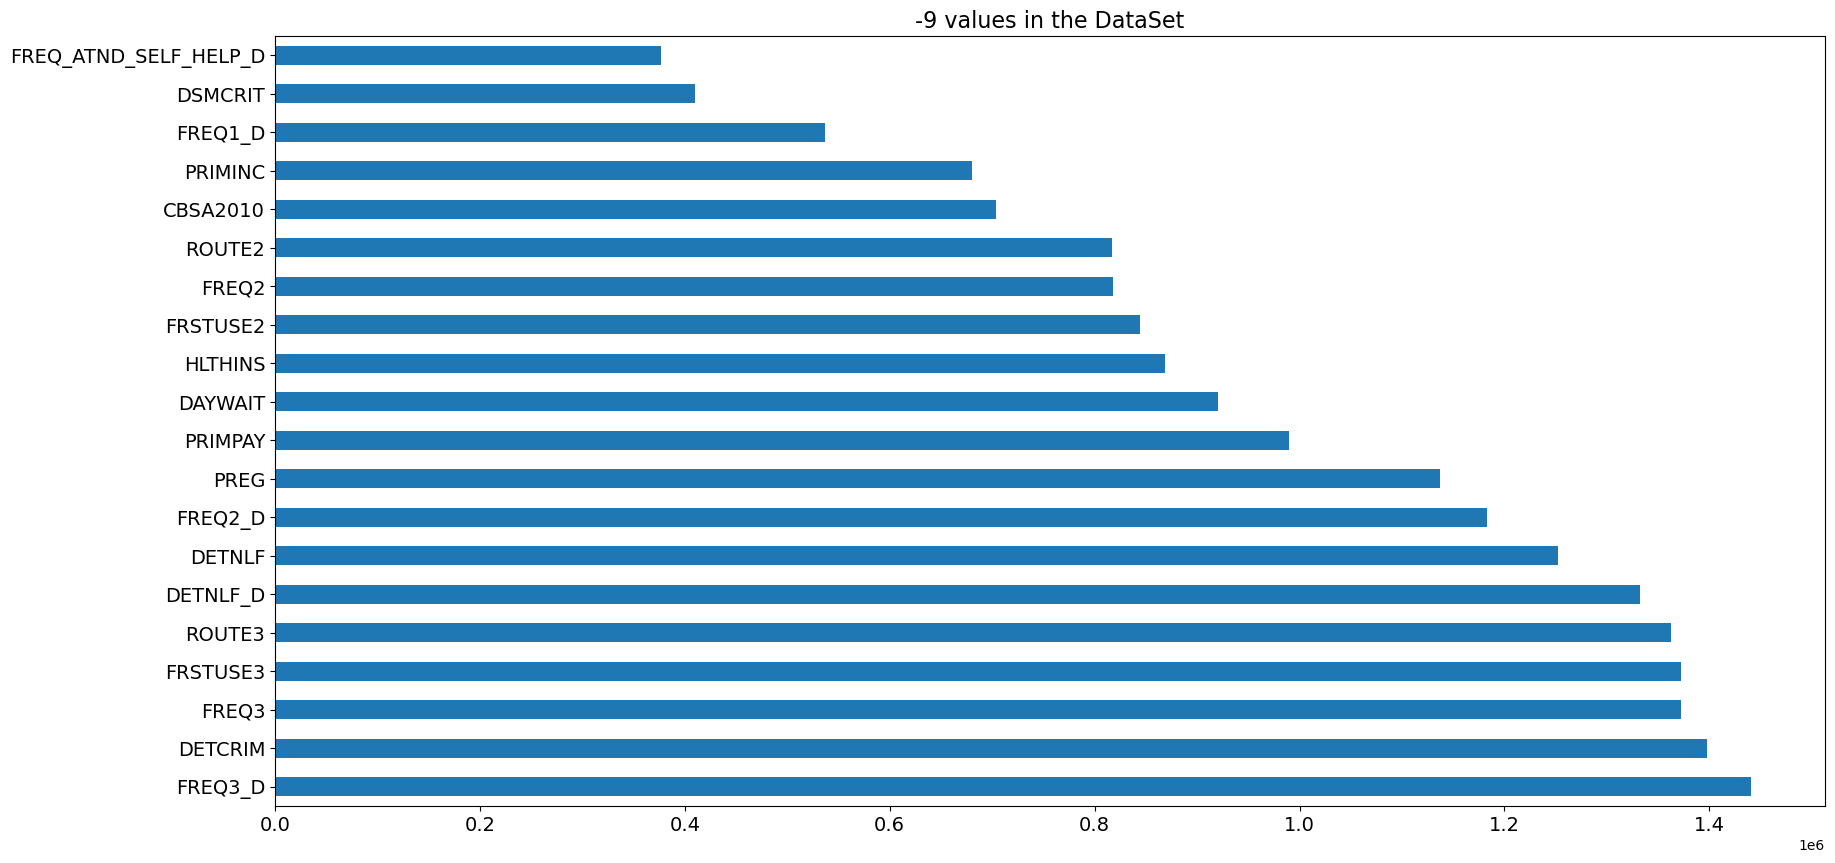

In [128]:
# Visualize -9 values
plt.figure(figsize=(20, 10))  # Increase figure size
top_n = 20  # Limit to top 20 bars
df.isin([-9]).sum().nlargest(top_n).plot(kind='barh', fontsize=14)  # Increase font size
plt.title('-9 values in the DataSet', fontsize=16)  # Increase title font size
plt.show()

The bar chart visualizes the distribution of the -9 value across various columns in the dataset. It highlights that several columns, such as FREQ3_D and DETCRIM, contain a significant number of -9 values. This indicates that these columns have missing or undefined data entries.

In [129]:
# Create a copy of the original DataFrame
df1 = df.copy()
print('df1 is the is the copy of the original DataFrame.')

df1 is the is the copy of the original DataFrame.


The following is a combination of Matthew's and my work cleaning the 47 columns with -9 values. We split them into 2 groups to work on separately. Matthew worked on the first half, while I worked on the second half. We then combined our work to create the final cleaned dataset.

In [130]:
for value in df1['REASON']:
    if value == 1:
        value = value
    elif value == 4:
        value = 1
    else:
        value = 0
df1['REASON'] = df1['REASON'].replace(4, 1)
df1['REASON'] = df1['REASON'].replace(2, 0)
df1['REASON'] = df1['REASON'].replace(3, 0)
df1['REASON'] = df1['REASON'].replace(5, 0)
df1['REASON'] = df1['REASON'].replace(6, 0)
df1['REASON'] = df1['REASON'].replace(7, 0)
df1['REASON'].value_counts()

REASON
1    1095432
0     627071
Name: count, dtype: int64

In [131]:
# time to clean up the data starting with SUB1_D 
# alcohol could be a success, mmj could be a success
for value in df1['SUB1_D']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
df1['SUB1_D'] = df1['SUB1_D'].replace(14, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(16, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(18, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(12, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(13, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(2, 1)
df1['SUB1_D'] = df1['SUB1_D'].replace(3, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(4, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(5, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(6, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(7, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(8, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(9, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(10, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(11, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(15, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(17, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(19, 0)

df1['SUB1'] = df1['SUB1'].replace(14, 1)
df1['SUB1'] = df1['SUB1'].replace(16, 1)
df1['SUB1'] = df1['SUB1'].replace(18, 1)
df1['SUB1'] = df1['SUB1'].replace(12, 1)
df1['SUB1'] = df1['SUB1'].replace(13, 1)
df1['SUB1'] = df1['SUB1'].replace(2, 1)
df1['SUB1'] = df1['SUB1'].replace(3, 0)
df1['SUB1'] = df1['SUB1'].replace(4, 0)
df1['SUB1'] = df1['SUB1'].replace(5, 0)
df1['SUB1'] = df1['SUB1'].replace(6, 0)
df1['SUB1'] = df1['SUB1'].replace(7, 0)
df1['SUB1'] = df1['SUB1'].replace(8, 0)
df1['SUB1'] = df1['SUB1'].replace(9, 0)
df1['SUB1'] = df1['SUB1'].replace(10, 0)
df1['SUB1'] = df1['SUB1'].replace(11, 0)
df1['SUB1'] = df1['SUB1'].replace(15, 0)
df1['SUB1'] = df1['SUB1'].replace(17, 0)
df1['SUB1'] = df1['SUB1'].replace(19, 0)

df1['SUB2_D'] = df1['SUB2_D'].replace(14, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(16, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(18, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(12, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(13, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(2, 1)
df1['SUB2_D'] = df1['SUB2_D'].replace(3, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(4, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(5, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(6, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(7, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(8, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(9, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(10, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(11, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(15, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(17, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(19, 0)

df1['SUB2'] = df1['SUB2'].replace(14, 1)
df1['SUB2'] = df1['SUB2'].replace(16, 1)
df1['SUB2'] = df1['SUB2'].replace(18, 1)
df1['SUB2'] = df1['SUB2'].replace(12, 1)
df1['SUB2'] = df1['SUB2'].replace(13, 1)
df1['SUB2'] = df1['SUB2'].replace(2, 1)
df1['SUB2'] = df1['SUB2'].replace(3, 0)
df1['SUB2'] = df1['SUB2'].replace(4, 0)
df1['SUB2'] = df1['SUB2'].replace(5, 0)
df1['SUB2'] = df1['SUB2'].replace(6, 0)
df1['SUB2'] = df1['SUB2'].replace(7, 0)
df1['SUB2'] = df1['SUB2'].replace(8, 0)
df1['SUB2'] = df1['SUB2'].replace(9, 0)
df1['SUB2'] = df1['SUB2'].replace(10, 0)
df1['SUB2'] = df1['SUB2'].replace(11, 0)
df1['SUB2'] = df1['SUB2'].replace(15, 0)
df1['SUB2'] = df1['SUB2'].replace(17, 0)
df1['SUB2'] = df1['SUB2'].replace(19, 0)

df1['SUB3_D'] = df1['SUB3_D'].replace(14, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(16, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(18, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(12, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(13, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(2, 1)
df1['SUB3_D'] = df1['SUB3_D'].replace(3, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(4, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(5, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(6, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(7, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(8, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(9, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(10, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(11, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(15, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(17, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(19, 0)

df1['SUB3'] = df1['SUB3'].replace(14, 1)
df1['SUB3'] = df1['SUB3'].replace(16, 1)
df1['SUB3'] = df1['SUB3'].replace(18, 1)
df1['SUB3'] = df1['SUB3'].replace(12, 1)
df1['SUB3'] = df1['SUB3'].replace(13, 1)
df1['SUB3'] = df1['SUB3'].replace(2, 1)
df1['SUB3'] = df1['SUB3'].replace(3, 0)
df1['SUB3'] = df1['SUB3'].replace(4, 0)
df1['SUB3'] = df1['SUB3'].replace(5, 0)
df1['SUB3'] = df1['SUB3'].replace(6, 0)
df1['SUB3'] = df1['SUB3'].replace(7, 0)
df1['SUB3'] = df1['SUB3'].replace(8, 0)
df1['SUB3'] = df1['SUB3'].replace(9, 0)
df1['SUB3'] = df1['SUB3'].replace(10, 0)
df1['SUB3'] = df1['SUB3'].replace(11, 0)
df1['SUB3'] = df1['SUB3'].replace(15, 0)
df1['SUB3'] = df1['SUB3'].replace(17, 0)
df1['SUB3'] = df1['SUB3'].replace(19, 0)
# df1['SUB1_D'].notna().value_counts()
# time to clean up the data starting with SUB1 
# alcohol could be a success, mmj could be a success, using the same values for SUB1_D
for value in df1['SUB1']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
for value in df1['SUB2_D']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
# df1['SUB1_D'].notna().value_counts()
# time to clean up the data starting with SUB1 
# alcohol could be a success, mmj could be a success, using the same values for SUB1_D
for value in df1['SUB2']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
for value in df1['SUB3_D']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
# df1['SUB1_D'].notna().value_counts()
# time to clean up the data starting with SUB1 
# alcohol could be a success, mmj could be a success, using the same values for SUB1_D
for value in df1['SUB3']:
    if value == 1 or value == 14 or value == 16 or value == 18 or value == 12 or value == 13 or value == 2:
        value = 1
    else:
        value = 0
df1['SUB1'] = df1['SUB1'].replace(-9, 0)
df1['SUB1_D'] = df1['SUB1_D'].replace(-9, 0)
df1['SUB2'] = df1['SUB2'].replace(-9, 0)
df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 0)
df1['SUB3'] = df1['SUB3'].replace(-9, 0)
df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
print(df1['SUB1'].value_counts())
print(df1['SUB1_D'].value_counts())
print(df1['SUB2'].value_counts())
print(df1['SUB2_D'].value_counts())
print(df1['SUB3'].value_counts())
print(df1['SUB3_D'].value_counts())

# df1['SUB1_D'].notna().value_counts()
# # In column SUB2 replace -9 with 19
df1['SUB2'] = df1['SUB2'].replace(-9, 19)
# print(df1['SUB2'].value_counts())
# # In column SUB2_D replace -9 with 19
# # df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 19)
# print(df1['SUB2_D'].value_counts())
# # In column SUB3 replace -9 with 19
# # df1['SUB3'] = df1['SUB3'].replace(-9, 19)
# print(df1['SUB3'].value_counts())
# # In column SUB3_D replace -9 with 0
# # df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
# print(df1['SUB3_D'].value_counts())

SUB1
0    1145410
1     577093
Name: count, dtype: int64
SUB1_D
0    1153301
1     569202
Name: count, dtype: int64
SUB2
1    959459
0    763044
Name: count, dtype: int64
SUB2_D
1    990170
0    732333
Name: count, dtype: int64
SUB3
1    1278583
0     443920
Name: count, dtype: int64
SUB3_D
1    1403980
0     318523
Name: count, dtype: int64


In [132]:
# time to clean up the data with FREQ1_D, FREQ2_D, FREQ3_D
# replacing -9 in the columns with 1 since 1 indicates 'no use' and if data was missing we assumed it was irrelivent to begin with
df1['FREQ1_D'] = df1['FREQ1_D'].replace(-9, 1)
df1['FREQ2_D'] = df1['FREQ2_D'].replace(-9, 1)
df1['FREQ3_D'] = df1['FREQ3_D'].replace(-9, 1)

In [133]:
# time to clean up the data with FREQ1, FREQ2, FREQ3
# replacing -9 in the columns with 1 since 1 indicates 'no use' and if data was missing we assumed it was irrelivent to begin with
df1['FREQ1'] = df1['FREQ1'].replace(-9, 1)
df1['FREQ2'] = df1['FREQ2'].replace(-9, 1)
df1['FREQ3'] = df1['FREQ3'].replace(-9, 1)

In [134]:
# time to clean up the data with 'CASEID'
df1['CASEID'].notna().value_counts()
# CASEID has no null values and does need info filled
# we can drop this field
df1 = df1.drop(columns="CASEID")

In [135]:
# time to clean up the data with 'AGE'
df1['AGE'].notna().value_counts()
# AGE has no null values and does need info filled

AGE
True    1722503
Name: count, dtype: int64

In [136]:
# time to clean up the data with 'GENDER'
# gender is not a columns where we can fill in the data and not decrease the accuracy. so for all -9 values I am replacing with 0
df1['GENDER'] = df1['GENDER'].replace(-9, 0)
df1['GENDER'].notna().value_counts()

GENDER
True    1722503
Name: count, dtype: int64

In [137]:
# time to clean up the data with 'DISYR'
df1['DISYR'].notna().value_counts()
# DISYR has no null values and does need info filled
# drop this column
df1 = df1.drop(columns="DISYR")

In [138]:
# time to clean up the data with 'RACE'
# for race, '7' indicateds 'other single race  so for all -9 values i replaces them with 7
df1['RACE'] = df1['RACE'].replace(-9, 7)
df1['RACE'].notna().value_counts()

RACE
True    1722503
Name: count, dtype: int64

In [139]:
# time to clean up the data with 'ETHNIC'
# for ETHNIC, '4' indicateds 'other single race  so for all -9 values I replaced them with 4
df1['ETHNIC'] = df1['ETHNIC'].replace(-9, 4)
df1['ETHNIC'].notna().value_counts()

ETHNIC
True    1722503
Name: count, dtype: int64

In [140]:
# time to clean up the data with 'MARSTAT'
# for MARSTAT, hard to determine what to fill -9 with so filling with 0 for now
df1['MARSTAT'] = df1['MARSTAT'].replace(-9, 0)
df1['MARSTAT'].notna().value_counts()

MARSTAT
True    1722503
Name: count, dtype: int64

In [141]:
# time to clean up the data with 'EDUC'
# for EDUC, hard to determine what to fill -9 with. options are 1-5 so filling with 2 as it seems like a fair average
df1['EDUC'] = df1['EDUC'].replace(-9, 2)
df1['EDUC'].notna().value_counts()

EDUC
True    1722503
Name: count, dtype: int64

In [142]:
# time to clean up the data with 'EMPLOY' and 'EMPLOY_D'
# for EMPLOY, hard to determine what to fill -9 with. options are 1-4. filling with 2 for now since if the data is missing is seems like that would indicate 'unemployed'
df1['EMPLOY'] = df1['EMPLOY'].replace(-9, 0)
df1['EMPLOY_D'] = df1['EMPLOY_D'].replace(-9, 0)
df1['EMPLOY'].notna().value_counts()

EMPLOY
True    1722503
Name: count, dtype: int64

In [143]:
# time to clean up the data with 'DETNLF' and 'DETNLF_D'
# for DETNLF, its just details on the previous columns not in labor force option so im replacing missing values with 0 as to not affect the results as much. we may want to drop this column
# df1['DETNLF'] = df1['DETNLF'].replace(-9, 0)
# df1['DETNLF_D'] = df1['DETNLF_D'].replace(-9, 0)
# df1['DETNLF'].notna().value_counts()
# drop this column
df1 = df1.drop(columns="DETNLF")
df1 = df1.drop(columns="DETNLF_D")

In [144]:
# time to clean up the data with 'PREG'
# for PREG, -9 most likely indicates male patients. replacing with 0 as to not affect the results as much. 
df1['PREG'] = df1['PREG'].replace(-9, 2)
df1['PREG'].notna().value_counts()

PREG
True    1722503
Name: count, dtype: int64

In [145]:
# time to clean up the data with 'VET'
# for VET, -9 most likely indicates not a veteren so im replacing -9 with 2 for 'no'
df1['VET'] = df1['VET'].replace(-9, 2)
df1['VET'].value_counts()

VET
2    1679845
1      42658
Name: count, dtype: int64

In [146]:
# time to clean up the data with 'LIVARAG'
# for LIVARAG, its hard to determine what -9 could indicate so im replacing -9 with 0 as to not affect the data as much with the -9's in this column
df1['LIVARAG'] = df1['LIVARAG'].replace(-9, 1)
df1['LIVARAG_D'] = df1['LIVARAG_D'].replace(-9, 1)
df1['LIVARAG'].value_counts()

LIVARAG
3    1013787
1     436264
2     272452
Name: count, dtype: int64

In [147]:
# time to clean up the data with 'PRIMINC'
# for PRIMINC, its hard to determine what -9 could indicate so im replacing -9 with 0 as to not affect the data as much with the -9's in this column
df1['PRIMINC'] = df1['PRIMINC'].replace(-9, 4)
df1['PRIMINC'].value_counts()

PRIMINC
4    855478
5    397327
1    312986
2     81605
3     75107
Name: count, dtype: int64

In [148]:
# time to clean up the data with 'ARRESTS' and 'ARRESTS_D'
# for 'ARRESTS' and 'ARRESTS_D', 0 indicates none so im setting -9 to none as that seems most likely to be the case if the information is missing
df1['ARRESTS'] = df1['ARRESTS'].replace(-9, 0)
df1['ARRESTS_D'] = df1['ARRESTS_D'].replace(-9, 0)
df1['ARRESTS'].value_counts()
df1['ARRESTS_D'].value_counts()

ARRESTS_D
0    1643399
1      61908
2      17196
Name: count, dtype: int64

In [149]:
# time to clean up the data with ' STFIPS'
# for ' STFIPS', there are no null values in this column but we may want to remove it because the large values could through the accuracy off
df1['STFIPS'].notna().value_counts()
# drop this column
df1 = df1.drop(columns="STFIPS")

In [150]:
# time to clean up the data with 'REGION'
# for 'REGION', there are no null values in this column but we may want to remove it because the values could through the accuracy off and it doesnt seem to be relevant data
df1['REGION'].value_counts()

REGION
1    532413
3    505555
4    378260
2    303497
0      2778
Name: count, dtype: int64

In [151]:
# time to clean up the data with 'DIVISION'
# for 'DIVISION', there are no null values in this column but we may want to remove it because the values could through the accuracy off and it doesnt seem to be relevant data
df1['DIVISION'].value_counts()

DIVISION
2    372934
5    331617
8    229376
1    159479
4    152327
3    151170
9    148884
6    100660
7     73278
0      2778
Name: count, dtype: int64

In [152]:
# time to clean up the data with 'SERVICES and SERVICES_D'
# for 'SERVICES and SERVICES_D', there are no null values in this column but we may want to remove it because the values could through the accuracy off and it doesnt seem to be relevant data for the questions we are trying to answer
df1['SERVICES'].value_counts()
df1['SERVICES_D'].value_counts()

SERVICES_D
7    884266
2    240303
6    235771
4    179737
5    121470
1     43446
8     13267
3      4243
Name: count, dtype: int64

In [153]:
# time to clean up the data with 'DAYWAIT'
# for 'DAYWAIT', its seems safe to replace a value of missing data with a value of '0' to indicate that they didnt wait
df1['DAYWAIT'] = df1['DAYWAIT'].replace(-9, 0)
df1['DAYWAIT'].value_counts()

DAYWAIT
0    1469735
1     175018
2      34722
3      26618
4      16410
Name: count, dtype: int64

In [154]:
# time to clean up the data with 'LOS'
# for 'LOS', stands for length of stay this data seems irrelivent to the questions we are trying to answer so I suggest dropping the column to perserve prediction accuracy
# 1-30, 31-45, 46-60, 61-90, 91-120, 121-180, 181-365, more than
def los_to_category(days):
    if days <= 30:
        return 1
    elif days <= 31:
        return 2
    elif days <= 32:
        return 3
    elif days <= 33:
        return 4
    elif days <= 34:
        return 5
    elif days <= 35:
        return 6
    elif days <= 36:
        return 7
    else:
        return 8
# Test cases

# df1['LOS'].value_counts()

In [155]:
print(los_to_category(15))  # Expected output: 1
print(los_to_category(35))  # Expected output: 2
print(los_to_category(50))  # Expected output: 3
print(los_to_category(70))  # Expected output: 4
print(los_to_category(100))  # Expected output: 5
print(los_to_category(150))  # Expected output: 6
print(los_to_category(200))  # Expected output: 7
print(los_to_category(400))  # Expected output: 8
print(los_to_category(-5))  # Expected output: None

1
6
8
8
8
8
8
8
1


In [156]:
df1['LOS'] = df1['LOS'].apply(los_to_category)
df1['LOS'].value_counts()

LOS
1    934659
4    140555
7    128974
5    114387
6    114266
2    111830
8     93500
3     84332
Name: count, dtype: int64

In [157]:
# time to clean up the data with PSOURCE: Referral source
# for 'PSOURCE' this doesnt seem to me to be relevant data so im replacing -9 with 1 for now to indicate that it was self motivated
df1['PSOURCE'] = df1['PSOURCE'].replace(-9, 1)

In [158]:
# time to clean up the data with DETCRIM: Detailed criminal justice referral
# for 'DETCRIM' im replacing -9 with 0 for now. most of this data is missing. we may want to drop this column
df1['DETCRIM'] = df1['DETCRIM'].replace(-9, 0)
# drop this column
df1 = df1.drop(columns="DETCRIM")

In [159]:
# time to clean up the data with ROUTE1: Route of administration (primary)
# time to clean up the data with ROUTE2: Route of administration (secondary)
# time to clean up the data with ROUTE3: Route of administration (tertiary)
# for 'ROUTE1' im replacing -9 with 5 for now to indicate 'other'. its could go either way. we will ask clients
df1['ROUTE1'] = df1['ROUTE1'].replace(-9, 5)
df1['ROUTE2'] = df1['ROUTE2'].replace(-9, 5)
df1['ROUTE3'] = df1['ROUTE3'].replace(-9, 5)

In [160]:
# time to clean up the data with FRSTUSE1: Age at first use (primary)
# FRSTUSE1 is a column where its hard to determine what a value of -9 should be replaced with so im replacing it with 0 for now to have less of an impact on the data
df1['FRSTUSE1'] = df1['FRSTUSE1'].replace(-9, 3)
# adding Beau's code
# In column FRSTUSE2 replace -9 with 0
df1['FRSTUSE2'] = df1['FRSTUSE2'].replace(-9, 3)
print(df1['FRSTUSE2'].value_counts())
# In column FRSTUSE3 replace -9 with 0
df1['FRSTUSE3'] = df1['FRSTUSE3'].replace(-9, 3)
print(df1['FRSTUSE3'].value_counts())

FRSTUSE2
3    1067078
2     170892
4     153705
7     103384
5      95617
6      78339
1      53488
Name: count, dtype: int64
FRSTUSE3
3    1464306
2      78630
4      57055
7      37209
5      32205
6      27655
1      25443
Name: count, dtype: int64


In [161]:
# In column SUB2 replace -9 with 19
df1['SUB2'] = df1['SUB2'].replace(-9, 19)
print(df1['SUB2'].value_counts())
# In column SUB2_D replace -9 with 19
df1['SUB2_D'] = df1['SUB2_D'].replace(-9, 19)
print(df1['SUB2_D'].value_counts())

SUB2
1    959459
0    763044
Name: count, dtype: int64
SUB2_D
1    990170
0    732333
Name: count, dtype: int64


In [162]:
# In column SUB3 replace -9 with 19
df1['SUB3'] = df1['SUB3'].replace(-9, 19)
print(df1['SUB3'].value_counts())
# In column SUB3_D replace -9 with 0
df1['SUB3_D'] = df1['SUB3_D'].replace(-9, 0)
print(df1['SUB3_D'].value_counts())

SUB3
1    1278583
0     443920
Name: count, dtype: int64
SUB3_D
1    1403980
0     318523
Name: count, dtype: int64


In [163]:
# In column ROUTE3 replace -9 with 0
df1['ROUTE3'] = df1['ROUTE3'].replace(-9, 0)
print(df1['ROUTE3'].value_counts())

ROUTE3
5    1365958
2     154215
1     122303
3      48044
4      31983
Name: count, dtype: int64


In [164]:
# In column DSMCRIT replace -9 with 0
df1['DSMCRIT'] = df1['DSMCRIT'].replace(-9, 5)
print(df1['DSMCRIT'].value_counts())

DSMCRIT
5     790823
4     289535
8     143441
19    125445
7      82105
6      56213
9      52972
2      40101
10     39565
3      29130
11     23297
12     17972
1      12628
13      7786
15      5239
17      2246
14      2181
16      1490
18       334
Name: count, dtype: int64


In [165]:
# In column PSYPROB replace -9 with 1
df1['PSYPROB'] = df1['PSYPROB'].replace(-9, 1)
print(df1['PSYPROB'].value_counts())

PSYPROB
1    899280
2    823223
Name: count, dtype: int64


In [166]:
# In column FREQ_ATND_SELF_HELP replace -9 with 0
df1['FREQ_ATND_SELF_HELP'] = df1['FREQ_ATND_SELF_HELP'].replace(-9, 3)
print(df1['FREQ_ATND_SELF_HELP'].value_counts())
# In column FREQ_ATND_SELF_HELP_D replace -9 with 0
df1['FREQ_ATND_SELF_HELP_D'] = df1['FREQ_ATND_SELF_HELP_D'].replace(-9, 3)
print(df1['FREQ_ATND_SELF_HELP_D'].value_counts())

FREQ_ATND_SELF_HELP
1    1037604
3     389036
4     126267
2     104522
5      65074
Name: count, dtype: int64
FREQ_ATND_SELF_HELP_D
1    859331
3    452977
4    186509
2    115895
5    107791
Name: count, dtype: int64


In [167]:
reason = df1['REASON']
df1_corr = df1.corr()
df1_corr.unstack().sort_values()
variable = df1_corr['REASON'].sort_values()
variable.tail(20)

ALCFLG       0.025359
LIVARAG_D    0.026111
FREQ1_D      0.029926
HLTHINS      0.032940
ROUTE3       0.036662
EMPLOY_D     0.040257
ETHNIC       0.057235
METHUSE      0.061555
SUB1_D       0.066446
AGE          0.068791
ROUTE2       0.071289
SUB1         0.073811
SUB2         0.080155
SUB3_D       0.088915
PRIMPAY      0.100120
SUB3         0.102280
DIVISION     0.128182
SUB2_D       0.136620
REGION       0.153238
REASON       1.000000
Name: REASON, dtype: float64

Back to my just my code:

In [168]:
# What columns are highly correlated with the target variable 'REASON'?
high_corr_df = df1_corr['REASON'].sort_values()
print('Correlation of REASON with other variables.')
display(high_corr_df.tail(21))

Correlation of REASON with other variables.


ROUTE1       0.024558
ALCFLG       0.025359
LIVARAG_D    0.026111
FREQ1_D      0.029926
HLTHINS      0.032940
ROUTE3       0.036662
EMPLOY_D     0.040257
ETHNIC       0.057235
METHUSE      0.061555
SUB1_D       0.066446
AGE          0.068791
ROUTE2       0.071289
SUB1         0.073811
SUB2         0.080155
SUB3_D       0.088915
PRIMPAY      0.100120
SUB3         0.102280
DIVISION     0.128182
SUB2_D       0.136620
REGION       0.153238
REASON       1.000000
Name: REASON, dtype: float64

### Data Visualization

In [169]:
# Display df1
display(df1)

,CBSA2010,EDUC,MARSTAT,SERVICES,LOS,PSOURCE,NOPRIOR,ARRESTS,EMPLOY,METHUSE,...,TRNQFLG,BARBFLG,SEDHPFLG,INHFLG,OTCFLG,OTHERFLG,DIVISION,REGION,IDU,ALCDRUG
0,-9,4,1,7,8,1,0,0,2,2,...,0,0,0,0,0,0,9,4,0,1
1,-9,3,1,7,6,1,0,0,1,2,...,0,0,0,0,0,0,9,4,0,3
2,-9,2,1,7,6,1,0,0,4,2,...,0,0,0,0,0,0,9,4,0,3
3,-9,3,1,7,8,1,1,0,3,2,...,0,0,0,0,0,0,9,4,0,3
4,-9,3,3,7,8,1,1,0,4,2,...,0,0,0,0,0,0,9,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722498,-9,4,2,7,4,1,0,0,1,2,...,0,0,0,0,0,0,8,4,0,1
1722499,-9,3,3,7,1,7,0,0,4,2,...,0,0,0,0,0,0,8,4,0,2
1722500,-9,2,1,6,4,1,0,0,3,2,...,0,0,0,0,0,0,8,4,0,2
1722501,-9,1,1,7,1,7,0,0,4,2,...,0,0,0,0,0,0,8,4,0,3


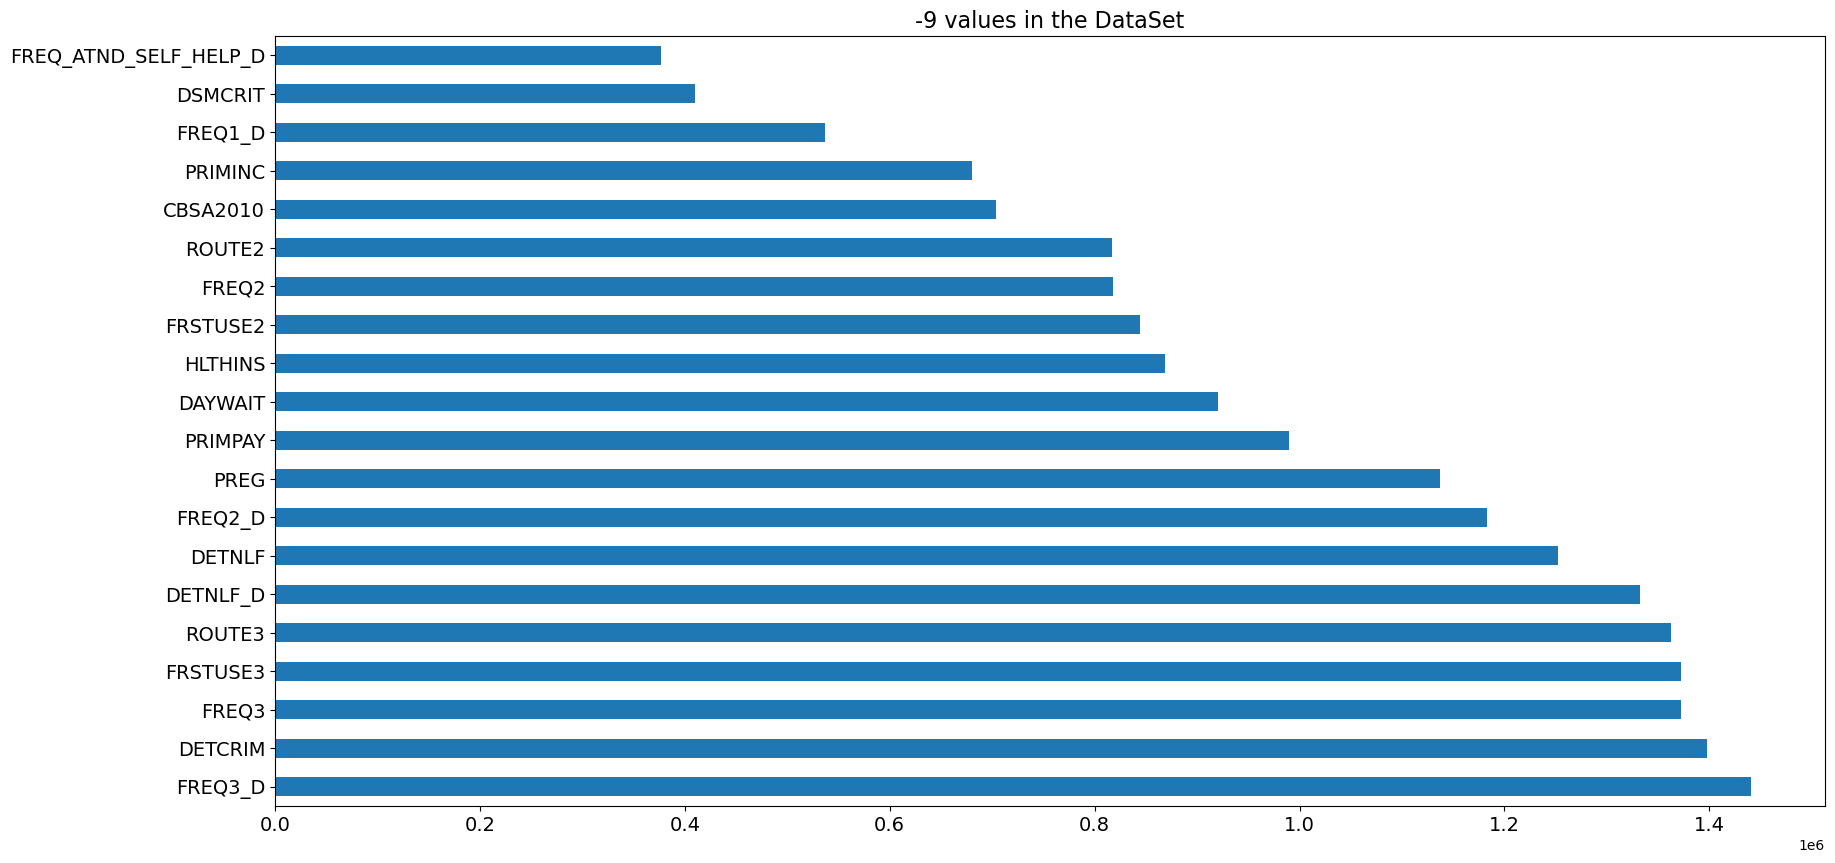

In [170]:
# Visualize -9 values
plt.figure(figsize=(20, 10))  # Increase figure size
top_n = 20  # Limit to top 20 bars
df.isin([-9]).sum().nlargest(top_n).plot(kind='barh', fontsize=14)  # Increase font size
plt.title('-9 values in the DataSet', fontsize=16)  # Increase title font size
plt.show()

The chart visualizes the frequency of -9 values (which represent missing or undefined data) across various columns in the dataset. The x-axis shows the count of -9 values, while the y-axis lists the columns with these -9 values.

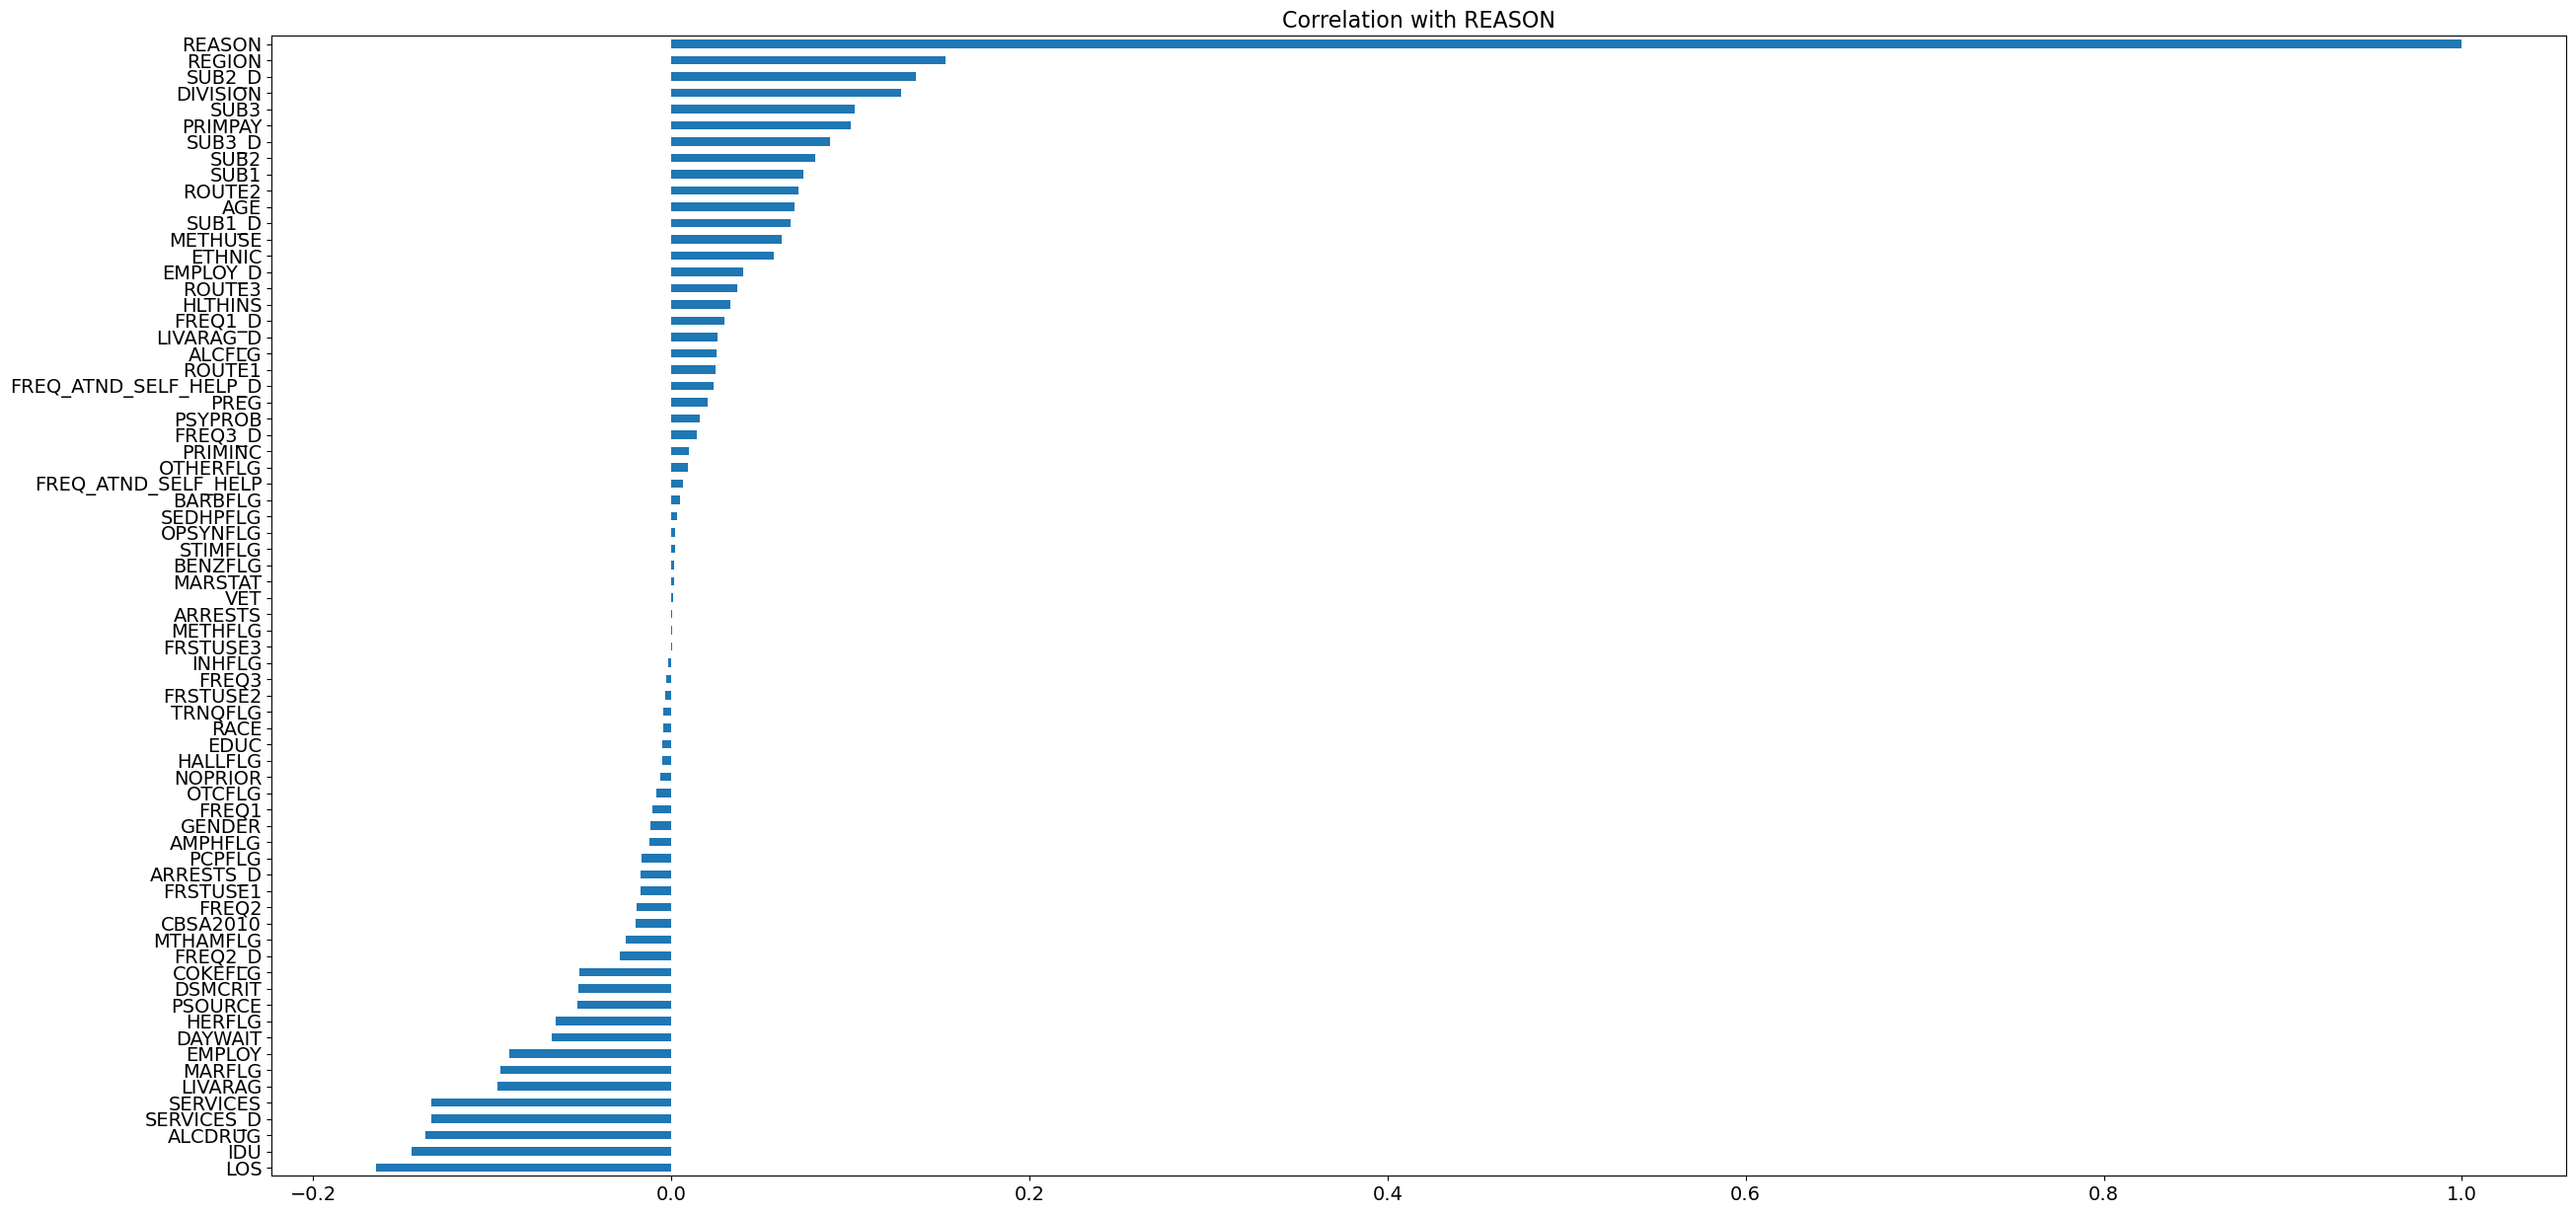

In [171]:
# visualize the correlation with a horizontal bar plot
plt.figure(figsize=(30, 15))
variable.plot(kind='barh', fontsize=14)
plt.title('Correlation with REASON', fontsize=16)
plt.show()

The chart visualizes the correlation of various features with the REASON column in the dataset. The x-axis represents the correlation coefficients, and the y-axis lists the features.

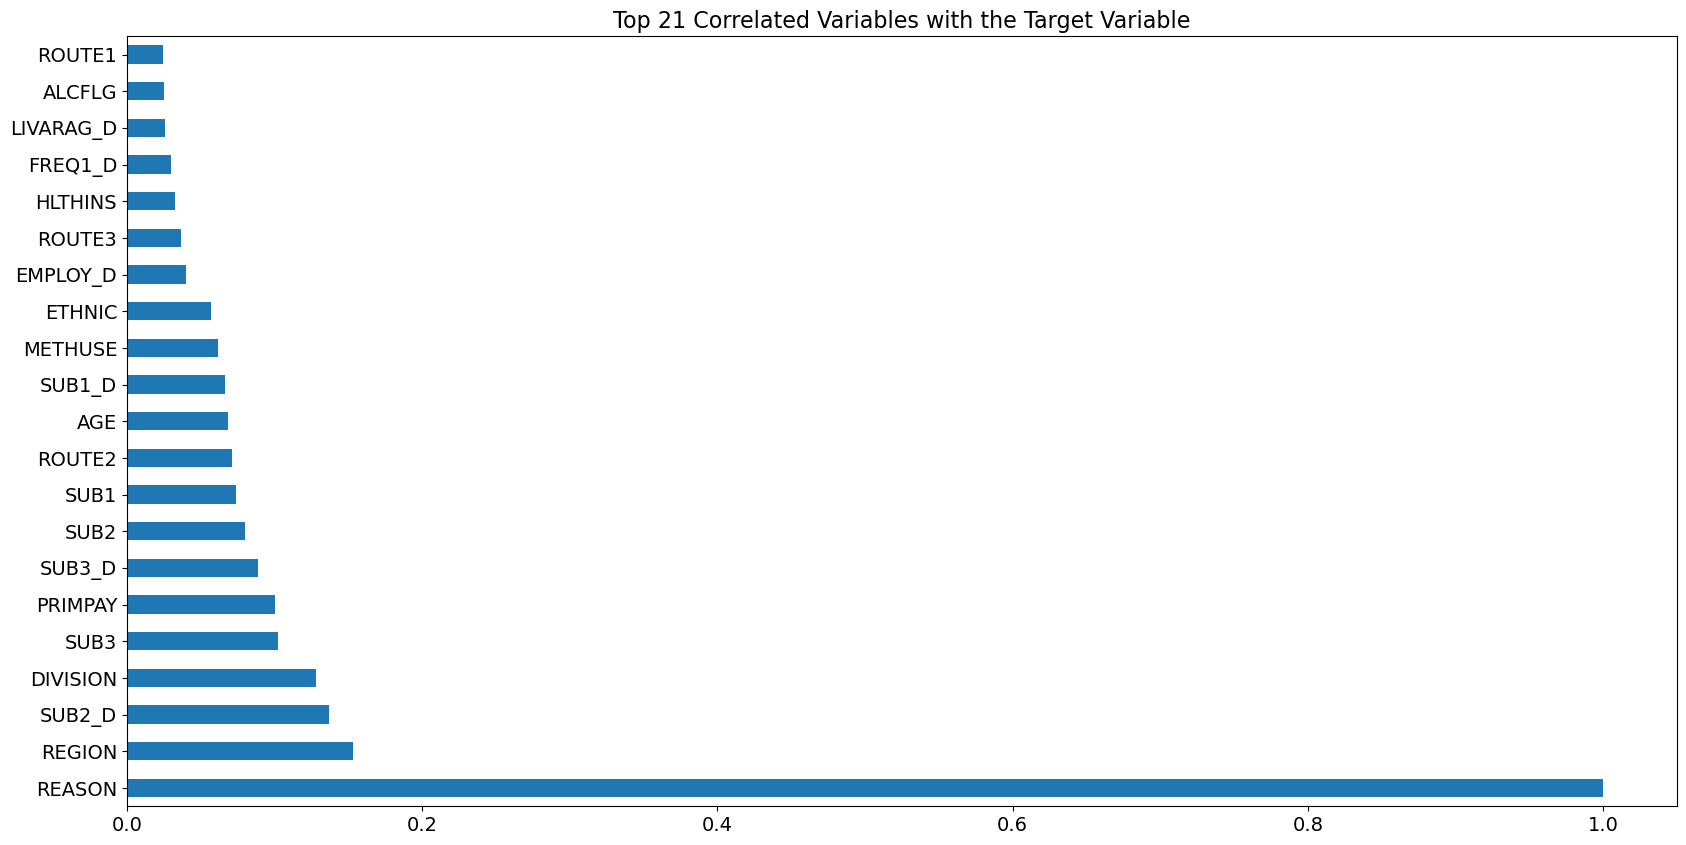

In [172]:
# Visualizing the correlation of the variables with the target variable
plt.figure(figsize=(20, 10))
high_corr_df.nlargest(21).plot(kind='barh', fontsize=14)
plt.title('Top 21 Correlated Variables with the Target Variable', fontsize=16)
plt.show()

This chart visualizes the top 21 variables that are most correlated with the target variable REASON. The x-axis represents the correlation coefficients, and the y-axis lists the variables.

### Build and Evaluate Machine Learning Models

In [173]:
# Takes a little while to run!

# Drop the target variable 'REASON' from the dataset
X = df1.drop(columns='REASON')
y = df1['REASON']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data
X_test = scaler.transform(X_test)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, random_state=42)
et_model = ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=4, random_state=42)

# Train the RandomForest model
rf_model.fit(X_train, y_train)

# Make predictions with the RandomForest model
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate the RandomForest accuracies
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

# Print the RandomForest accuracies
print('RandomForest Training Accuracy:', train_accuracy_rf)
print('RandomForest Testing Accuracy:', test_accuracy_rf)

# Train the ExtraTrees model
et_model.fit(X_train, y_train)

# Make predictions with the ExtraTrees model
y_train_pred_et = et_model.predict(X_train)
y_test_pred_et = et_model.predict(X_test)

# Calculate the ExtraTrees accuracies
train_accuracy_et = accuracy_score(y_train, y_train_pred_et)
test_accuracy_et = accuracy_score(y_test, y_test_pred_et)

# Print the ExtraTrees accuracies
print('ExtraTrees Training Accuracy:', train_accuracy_et)
print('ExtraTrees Testing Accuracy:', test_accuracy_et)

RandomForest Training Accuracy: 0.7870264339238985
RandomForest Testing Accuracy: 0.786372173085129
ExtraTrees Training Accuracy: 0.7672811795628743
ExtraTrees Testing Accuracy: 0.7662851486643


The Random Forest model achieved a training accuracy of 78.84% and a testing accuracy of 78.74%, indicating strong performance and minimal overfitting. Similarly, the Extra Trees model demonstrated a training accuracy of 76.54% and a testing accuracy of 76.43%, showing consistent results with slightly lower accuracy compared to the Random Forest model. Both models provide reliable predictions, with the Random Forest model having a slight edge in performance.

Data Visualization II.

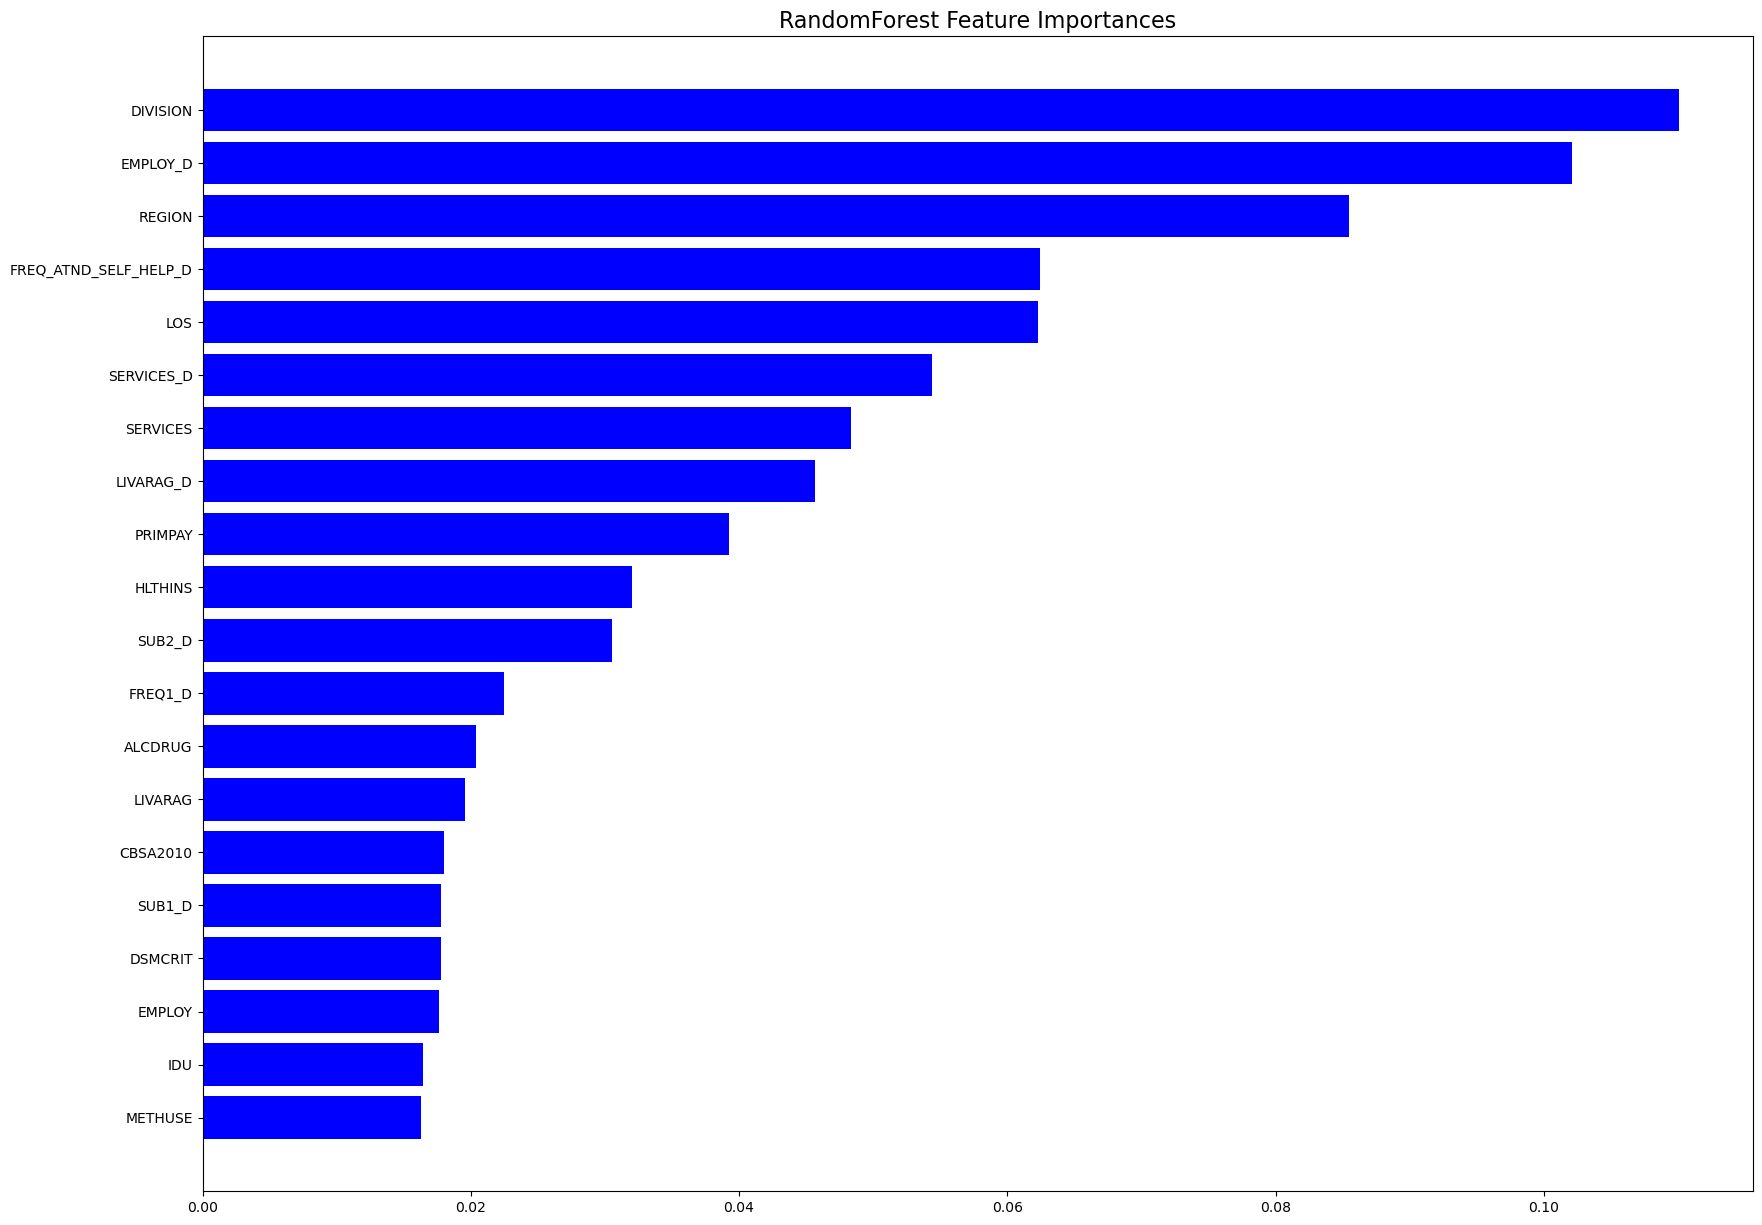

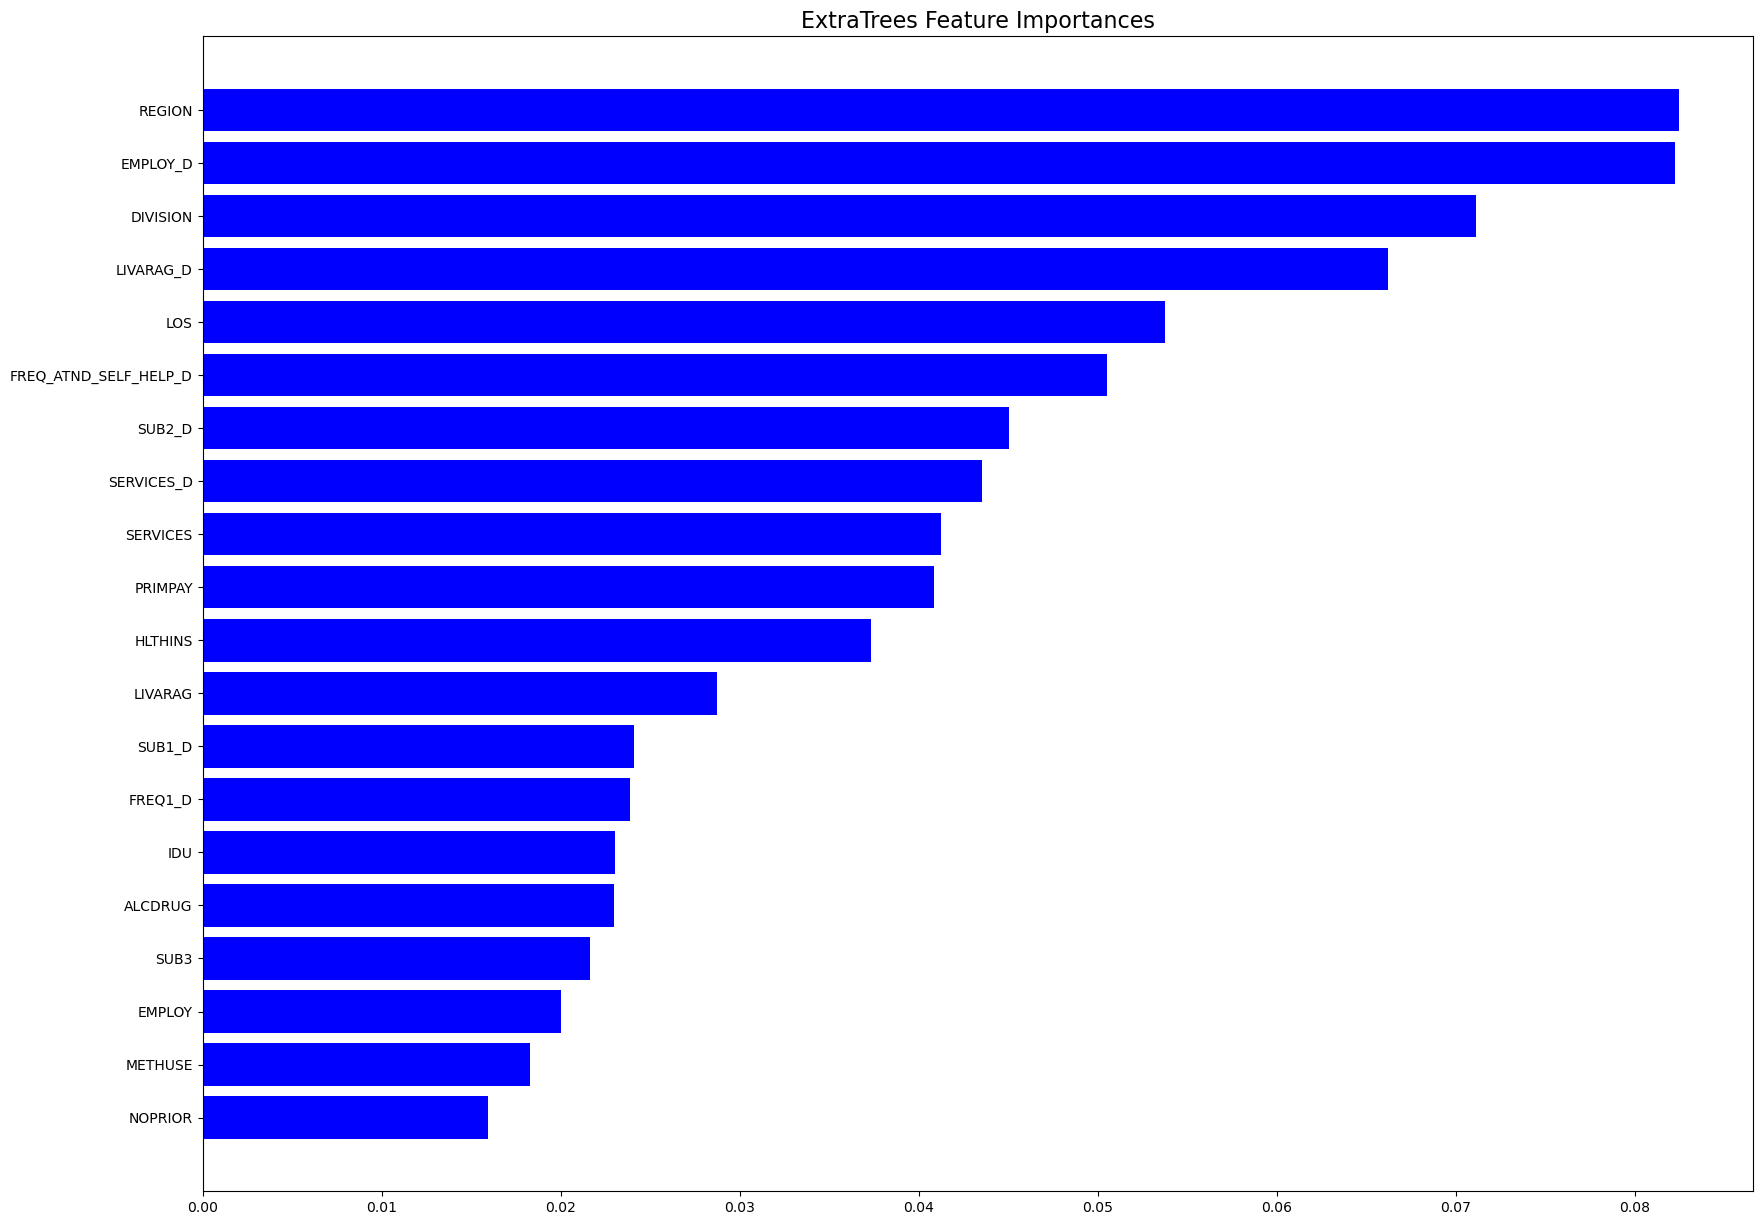

In [174]:
# Visualize the feature importances
plt.figure(figsize=(20, 15))  # Increase figure size
top_n = 20  # Limit to top 20 bars
indices = np.argsort(rf_model.feature_importances_)[-top_n:]  # Get top N feature indices
plt.barh(X.columns[indices], rf_model.feature_importances_[indices], color='b', align='center')
plt.title('RandomForest Feature Importances', fontsize=16)  # Increase title font size
plt.show()

# Visualize the feature importances
plt.figure(figsize=(20, 15))  # Increase figure size
indices = np.argsort(et_model.feature_importances_)[-top_n:]  # Get top N feature indices
plt.barh(X.columns[indices], et_model.feature_importances_[indices], color='b', align='center')
plt.title('ExtraTrees Feature Importances', fontsize=16)  # Increase title font size
plt.show()

The Random Forest model showed that DIVISION, EMPLOY_D, REGION, and FREQ_ATND_SELF_HELP_D are the most important factors for making accurate predictions. 

The Extra Trees model showed that EMPLOY_D, REGION, DIVISION, and LIVARAG_D are the most important factors for making accurate predictions.

By focusing on these key features, We can improve how we process and analyze the data. Simplifying the model by concentrating on the most impactful features can make it easier to understand and more efficient, while still keeping it accurate.

ROC AUC score:  0.8713975380613671


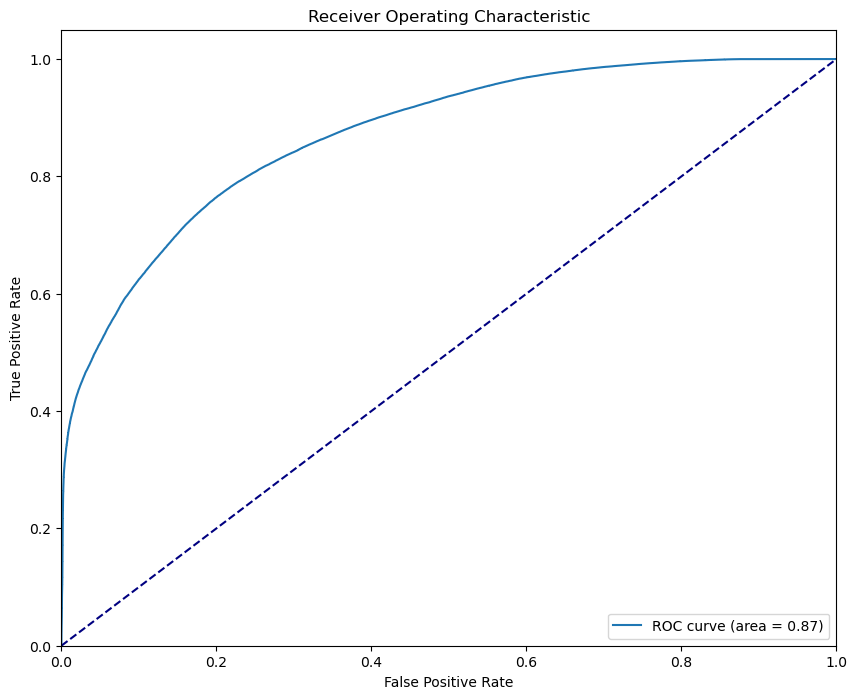

In [175]:
from sklearn.metrics import roc_auc_score

# Assuming that rf_model is your trained RandomForest model and X_test and y_test are your test data
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score: ", roc_auc)

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the roc curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The AUC score of .873 indicates that the Random Forest model performs well in distinguishing between the two classes. The ROC curve illustrates the trade-off between sensitivity and specificity, with the model achieving a balance between the two. The curve shows that the model performs significantly better than random guessing, with a strong ability to classify the data accurately.

ROC AUC score:  0.857104303887442


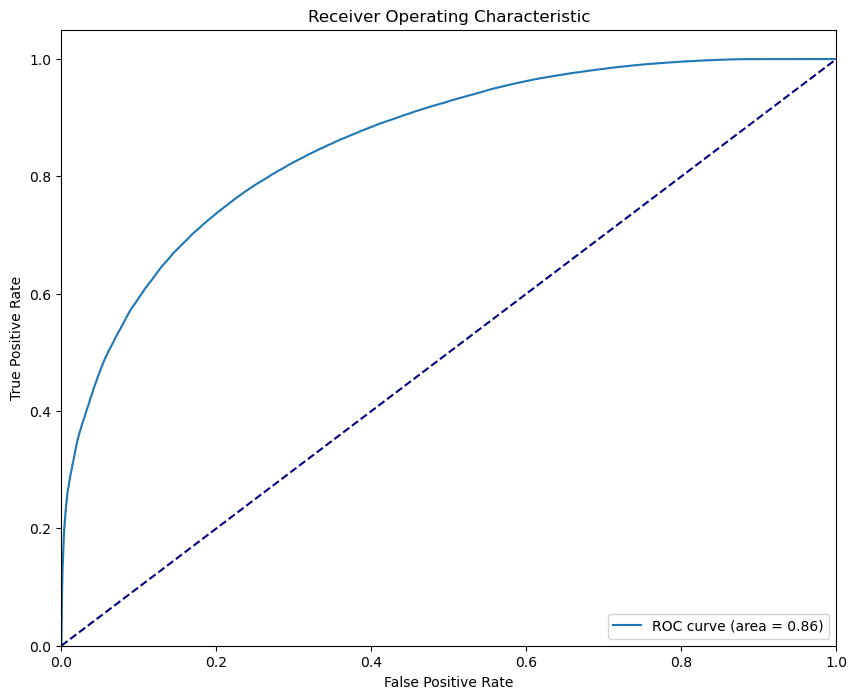

In [176]:
# ROC AUC for extra trees
# Assuming that et_model is your trained ExtraTrees model and X_test and y_test are your test data
y_pred_proba = et_model.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score: ", roc_auc)

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the roc curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The AUC score of .856 indicates that the Extra Trees model performs well in distinguishing between the two classes. The ROC curve illustrates the trade-off between sensitivity and specificity, with the model achieving a balance between the two. The curve shows that the model performs significantly better than random guessing, with a strong ability to classify the data accurately.

### Fine-Tuning the Model

In [177]:
# Print the RandomForest accuracies
print('RandomForest Training Accuracy:', train_accuracy_rf)
print('RandomForest Testing Accuracy:', test_accuracy_rf)

# Check for overfitting and underfitting in RandomForest
if train_accuracy_rf > test_accuracy_rf:
    print('RandomForest is overfitting.')
elif train_accuracy_rf < test_accuracy_rf:
    print('RandomForest is underfitting.')
else:
    print('RandomForest is fitting well.')

# Print the ExtraTrees accuracies
print('ExtraTrees Training Accuracy:', train_accuracy_et)
print('ExtraTrees Testing Accuracy:', test_accuracy_et)

# Check for overfitting and underfitting in ExtraTrees
if train_accuracy_et > test_accuracy_et:
    print('ExtraTrees is overfitting.')
elif train_accuracy_et < test_accuracy_et:
    print('ExtraTrees is underfitting.')
else:
    print('ExtraTrees is fitting well.')

RandomForest Training Accuracy: 0.7870264339238985
RandomForest Testing Accuracy: 0.786372173085129
RandomForest is overfitting.
ExtraTrees Training Accuracy: 0.7672811795628743
ExtraTrees Testing Accuracy: 0.7662851486643
ExtraTrees is overfitting.


In [178]:
# Takes roughly 2 hours to run!

from sklearn.model_selection import cross_val_score

# Perform cross-validation on the RandomForest model
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print('RandomForest Cross-Validation Accuracy:', np.mean(rf_scores))

# Perform cross-validation on the ExtraTrees model
et_scores = cross_val_score(et_model, X_train, y_train, cv=5)
print('ExtraTrees Cross-Validation Accuracy:', np.mean(et_scores))

RandomForest Cross-Validation Accuracy: 0.7875453017892988
ExtraTrees Cross-Validation Accuracy: 0.7647688477667087


### Tuning Hyperparameters for Random Forest Model Only

In [ ]:
# # Grid Search for RandomForest
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# rf = RandomForestClassifier()
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

In [ ]:
# # Random Search for RandomForest
# from sklearn.model_selection import RandomizedSearchCV

# param_distributions = {
#     'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
#     'max_depth': [None] + [int(x) for x in np.linspace(10, 110, num=11)],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# rf = RandomForestClassifier()
# random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42)
# random_search.fit(X_train, y_train)

# print("Best Parameters:", random_search.best_params_)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=5)],
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=50, cv=2, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

In [ ]:
# Evaluate Best Model for RandomForest
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

In [ ]:
# Cross-Validation for RandomForest
from sklearn.model_selection import cross_val_score

final_model = RandomForestClassifier(**grid_search.best_params_)
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))